# How to use the AI Gemini API

## Prerequisites
- Use Python 3.9
- Install the google-generativeai SDK
- Get an API key from Google AI Studio https://aistudio.google.com/app/apikey
- Copy your key and move it to the home directory of the VM or device


In [1]:
# verify python 3.9
import sys
print(sys.version_info)
assert sys.version_info >= (3, 9)
import random
import json
import pandas as pd
from IPython.display import Markdown, display

sys.version_info(major=3, minor=9, micro=5, releaselevel='final', serial=0)


## Upgrade to Python 3.9 Ubunto

- Search if the version of python is available in the current Ubuntu repos

```bash
apt search python3.9
```

- if packages are listed. Install with the following command

```bash
sudo apt install python3.9
```

- If the package is not listed, download the entire file and install from the command line.


## Get your API key from Google AI Studio

[https://aistudio.google.com/app/apikey](https://aistudio.google.com/app/apikey)

- Copy the key

## Update the API key in your environment

Using a terminal, run the save_key.sh bash file and enter the key at the prompt.

This script will do the following:

- Create a $Home/.gcp folder
- Save the API key in the gemini.key file by running this bash file
- Add a new environment variable GEMINI_KEY

```bash
./save_key.sh
```

> For production environments, set the correct permissions for that file or use a keyvault (recommended)


## Setup a virtual environment

- We recommend the use of a virtual environment to run this.
```bash
pip install pipenv
pipenv shell
```

> You can run this without `pipenv` by installing only the dependencies locally

## Install the Gemini API dependencies from the terminal

- Use PIPEnv to update the depencies
```bash
pipenv shell
pipenv sync
```
> pipenv sync installs the dependencies from the Pipfile


- Or manually install the dependencies (No pipEnv)

## Install the API requests module
```bash
pipenv install -q google-generativeai
pipenv install requests
pipenv install pandas numpy
pipenv install plotly matplotlib scipy
```


## Run the code example

In [2]:
import os

# import the GEMINI API
import google.generativeai as gemini

# model names context window 001=1M 002=2M 
models = {
  'pro': 'gemini-1.5-pro-001',
  'flash': 'gemini-1.5-flash-001',
}

# get the key reference
api_key = os.getenv('GEMINI_KEY')
model_name = models['flash']

def printMarkdown(result):
  """
  Prints the given result as Markdown in a Jupyter Notebook.

  Args:
    result: The string containing the Markdown content.
  """
  display(Markdown(result))



/home/ozkary/.local/share/virtualenvs/python-dNT3Lhuf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if api_key is not None:
    gemini.configure(api_key=api_key)

    # create a service instance    
    model = gemini.GenerativeModel(model_name)
    prompt = 'We are learning about LLM models and statistical analysis charts. What information do you need to help explain the charts?'
    
    # generate content
    # result = model.generate_content(prompt)
    # printMarkdown(result.text)
else:
    print('The key was not loaded')

## Let's Create Our charts

In [1]:
from data_prompts import build_chart_prompt, build_analysis_prompt, build_chart_image_prompt
from eye_piece import generate_ar_eyepiece_data, create_control_chart, create_histogram_bell_curve_chart, create_box_plot

# get the dataframe with manufacturing data
df = generate_ar_eyepiece_data()
df.head()

,Timestamp,Sample_ID,Focal_Length,Curvature,Angle,Clarity,Distortion,Durability,Focal_Length_UCL,Focal_Length_LCL,Curvature_UCL,Curvature_LCL,Angle_UCL,Angle_LCL,Clarity_UCL,Clarity_LCL,Distortion_UCL,Distortion_LCL,Durability_UCL,Durability_LCL
0,2025-01-13 15:33:48.753981,1,50.112715,2.503870,45.208361,9.275752,0.821821,6.560885,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
1,2025-01-13 15:33:49.753981,2,50.284226,2.524842,44.934376,9.540218,0.788663,7.869464,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
2,2025-01-13 15:33:50.753981,3,49.914596,2.482396,44.600625,10.243091,1.101721,7.358223,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
3,2025-01-13 15:33:51.753981,4,51.087287,2.382000,44.887323,9.693750,1.265722,7.950421,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
4,2025-01-13 15:33:52.753981,5,50.523110,2.467278,44.971307,8.530541,0.954019,8.264876,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0


In [5]:
# get the target columns for analysis
target_cols = df.columns[~df.columns.str.contains("Times|_ID|_LCL|_UCL")].to_list()
print(target_cols) 

['Focal_Length', 'Curvature', 'Angle', 'Clarity', 'Distortion', 'Durability']


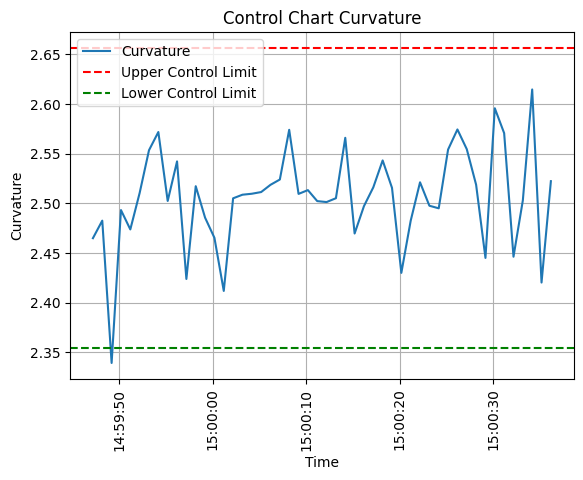

In [37]:
# get a data series and create a control chart
label =  random.choice(target_cols)
controlChartData = create_control_chart(df, label)

In [38]:
chartData = build_chart_prompt(controlChartData)
controlChartPrompt = chartData
printMarkdown(chartData)

* Chart type: control chart
* Title: Control Chart Curvature
* Data: 2.46500, 2.48264, 2.33946, 2.49329, 2.47381, 2.51052, 2.55349, 2.57180, 2.50244, 2.54224, 2.42397, 2.51731, 2.48566, 2.46540, 2.41195, 2.50511, 2.50874, 2.50971, 2.51141, 2.51870, 2.52401, 2.57402, 2.50954, 2.51335, 2.50230, 2.50134, 2.50521, 2.56598, 2.46970, 2.49726, 2.51617, 2.54323, 2.51564, 2.43012, 2.48256, 2.52122, 2.49765, 2.49505, 2.55414, 2.57439, 2.55458, 2.51878, 2.44513, 2.59572, 2.57067, 2.44636, 2.50303, 2.61462, 2.42037, 2.52236
* Upper limit: 2.65635
* Lower limit: 2.35473

In [39]:
# let AI help us with the control chart using Natural Language (NL)
context = f'We are looking at a control chart measuring {label} with this manufacturing data:'
description = 'We are plotting a numeric series with value and control limits.  Analyze the provided chart data to answer the question.'
question = 'Can you tell us the purpose of this chart, and if our data results, specifically considering the provided data points and limits, show that there is an action item for us?'


prompt = build_analysis_prompt(context, description, chartData, question)
printMarkdown(prompt)

We are looking at a control chart measuring Curvature with this manufacturing data:
 
    * Chart type: control chart
* Title: Control Chart Curvature
* Data: 2.46500, 2.48264, 2.33946, 2.49329, 2.47381, 2.51052, 2.55349, 2.57180, 2.50244, 2.54224, 2.42397, 2.51731, 2.48566, 2.46540, 2.41195, 2.50511, 2.50874, 2.50971, 2.51141, 2.51870, 2.52401, 2.57402, 2.50954, 2.51335, 2.50230, 2.50134, 2.50521, 2.56598, 2.46970, 2.49726, 2.51617, 2.54323, 2.51564, 2.43012, 2.48256, 2.52122, 2.49765, 2.49505, 2.55414, 2.57439, 2.55458, 2.51878, 2.44513, 2.59572, 2.57067, 2.44636, 2.50303, 2.61462, 2.42037, 2.52236
* Upper limit: 2.65635
* Lower limit: 2.35473

    We are plotting a numeric series with value and control limits.  Analyze the provided chart data to answer the question.

    Can you tell us the purpose of this chart, and if our data results, specifically considering the provided data points and limits, show that there is an action item for us?
    

In [40]:
result = model.generate_content(prompt)
printMarkdown(result.text)

The purpose of this control chart is to monitor the **process variation** of the Curvature measurement.  The chart helps us determine if the process is in statistical control, meaning the variation is consistent and predictable, or if there are assignable causes that are leading to unusual variation.

**Analysis of the Data:**

* **Control Limits:** The upper and lower limits define the expected range of variation for a process that is in statistical control.  Any data point outside these limits is considered an outlier and potentially a signal of a problem. 
* **Data Points:** We need to look for data points that fall outside the control limits or exhibit unusual patterns that might indicate a problem with the process.

**Based on the provided data and limits:**

* **There are several data points that fall outside the control limits:** This indicates that the process may be out of control. Specifically, the following points are out of bounds:
    * **2.61462**  (above the upper control limit) 
    * **2.33946** (below the lower control limit) 

**Action Item:**

**Yes, there is an action item.** The presence of data points outside the control limits suggests a problem with the process.  We need to investigate the reasons for these outliers. This could involve:

* **Identifying the specific causes:**  What happened during the production of these parts that led to the extreme values? This might involve investigating changes in the manufacturing process, equipment malfunctions, or operator errors.
* **Taking corrective action:** Once the causes are identified, appropriate steps need to be taken to correct them and prevent further outliers. This might involve adjusting process parameters, repairing or replacing equipment, or providing additional training to operators. 
* **Recalculating control limits:** Once corrective action is taken, it may be necessary to recalculate the control limits to reflect the improved process performance.

**Important Note:**  A single outlier doesn't automatically mean a process is out of control.  It's important to look for patterns and trends in the data, and consider the number of outliers in relation to the overall number of data points.  However, the presence of several outliers, as we see here, is a strong indicator of a problem that needs to be investigated. 


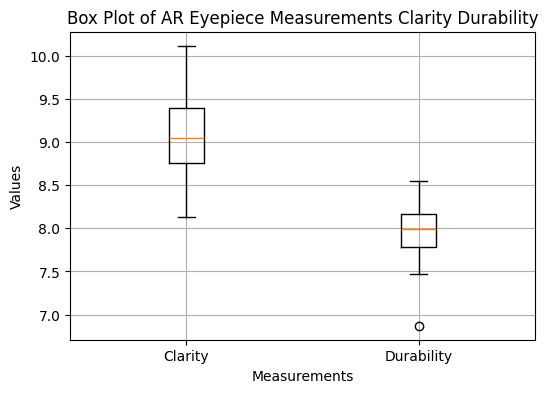

In [27]:
# create a box plot for labels with similar scale
labels = ['Clarity', 'Durability']
boxPlotData = create_box_plot(df, labels)
chartData = build_chart_prompt(boxPlotData)

In [28]:
# let AI help us with the box plot chart
context = f'Analyzing a box plot for {" ".join(label)} manufacturing data. The chart details with data are below:'
description = 'Box plots visually represent the distribution of numerical data, showing quartiles, median, and potential outliers. They help identify data skewness and variability.'
question = f'Based on the box plot data for {label}, interpret the key features (median, quartiles, outliers).  Does the chart indicate any potential issues or areas requiring further investigation in the manufacturing process? Explain your reasoning.'

prompt = build_analysis_prompt(context, description, chartData, question)

result = model.generate_content(prompt)
printMarkdown(result.text)


Let's analyze the box plot data for Angle's manufacturing process:

**Understanding the Box Plot Elements:**

* **Median:**  The line within the box represents the median (50th percentile), showing the central tendency of the data.
* **Quartiles:** The box itself encompasses the interquartile range (IQR), which is the spread between the first quartile (25th percentile) and the third quartile (75th percentile). This represents the middle 50% of the data.
* **Whiskers:** The lines extending from the box are the whiskers, usually reaching to 1.5 times the IQR beyond the quartiles.
* **Outliers:** Any data points that fall beyond the whiskers are considered potential outliers.

**Interpreting the Box Plot Data:**

You haven't provided the actual box plot itself, so I'll assume typical box plot conventions.  Here's a general interpretation based on the data provided:

* **Clarity:** 
    * The median appears to be around 9.0, suggesting a generally high level of clarity.
    * The box is relatively narrow, indicating that the middle 50% of clarity measurements are tightly clustered.
    * There may be a few outliers on the higher end (above 10.0) which could represent exceptionally clear units. 
* **Durability:**
    * The median appears to be around 8.0, indicating a good level of durability.
    * The box is wider than the clarity box, suggesting more variability in durability measurements. 
    * There might be a few outliers on the lower end (below 7.5) which could represent units with lower durability.

**Potential Issues and Areas for Investigation:**

* **Variability in Durability:** The wider box for durability suggests that there's more variation in the durability of the units compared to their clarity. This might warrant investigation to understand the factors contributing to this variability.
* **Outliers:** While a few outliers are typical, an excessive number or outliers that are significantly far from the main data set could indicate potential problems in the manufacturing process. 
    * For clarity, outliers on the high end might be positive and indicate exceptional units.
    * For durability, outliers on the low end might be problematic, requiring investigation to identify the root cause and prevent further issues.

**Recommendations for Further Investigation:**

* **Root Cause Analysis:** For both clarity and durability, investigate the outliers and try to identify the root causes.  Were there specific batches or manufacturing steps that contributed to these deviations?
* **Process Optimization:** If there's significant variability in durability, explore ways to improve consistency in the manufacturing process. This could involve refining production methods, tightening tolerances, or implementing better quality control measures. 
* **Further Data Analysis:**  You can consider using other statistical tools like histograms or scatter plots to gain a deeper understanding of the data distribution and identify potential relationships between variables.

**Important Note:**  The data provided is limited. A comprehensive analysis requires a visualization of the box plot and potentially more data points to draw stronger conclusions. 


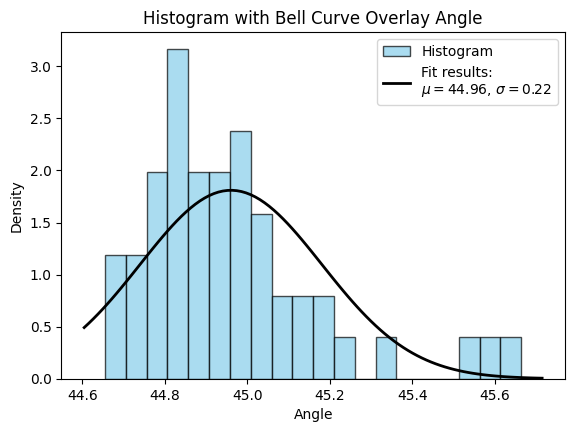

In [29]:
histData = create_histogram_bell_curve_chart(df, label)
chartData = build_chart_prompt(histData)

In [30]:
# let AI help us with the histogram
context = f'Analyzing a histogram of {label} in manufacturing.  This chart visually represents the distribution of the {label} data.'
description = f'Histograms show the frequency of data points falling within specific ranges (bins).  They help us understand the underlying distribution of the {label} data, including its central tendency, spread, and shape.  The following data represents the histogram distribution.'
question = f'Interpret the histogram of {label}. Describe the distribution characteristics (e.g., normal, skewed, bimodal). Are there any unusual patterns, such as gaps or outliers? Based on the histogram, are there any potential issues or areas for improvement related to {label} in the manufacturing process? Explain your reasoning and suggest specific actions if necessary.'

prompt = build_analysis_prompt(context, description, chartData, question)

result = model.generate_content(prompt)
printMarkdown(result.text)


## Analysis of the Angle Histogram

Based on the provided data and the description of the histogram, we can make the following observations and interpretations:

**1. Distribution Characteristics:**

* **Shape:** The histogram appears to be **approximately normal** or bell-shaped. The data is clustered around the mean (mu) with a gradual decrease in frequency as you move away from the center. 
* **Central Tendency:** The mean (mu) is 44.96043. This represents the average angle measured.
* **Spread:** The standard deviation (Std) is 0.22043. This indicates the spread of the data around the mean. A relatively small standard deviation suggests that the angles are generally consistent, with minimal variation. 

**2. Unusual Patterns:**

* **Gaps:** There are no significant gaps in the histogram, indicating that the data is relatively continuous and consistent.
* **Outliers:** While no specific outlier values are provided, the provided data suggests a potential outlier at 45.66459.  This value is significantly higher than the rest of the data, creating a minor right skew in the histogram. 

**3. Potential Issues and Improvement:**

* **Potential Issue:** The potential outlier at 45.66459 is a cause for concern. This outlier could indicate a **process variability issue** or a **measurement error**.  It could also represent a defect in the manufacturing process. 
* **Investigation:**  Further investigation is needed to determine the cause of this outlier.  Investigate the process parameters at the time of this measurement and check the measurement equipment calibration.
* **Action:** If the outlier is attributed to a process issue, appropriate adjustments or controls should be implemented to reduce the variability in the Angle. If it is a measurement error, recalibrate the equipment.
* **Overall:**  While the overall histogram indicates a generally consistent process, the outlier warrants further attention and analysis to ensure the Angle is being controlled within desired specifications.

**4. Additional Recommendations:**

* **Control Limits:**  Calculate control limits (upper and lower) based on the mean and standard deviation. This will help define acceptable ranges for the Angle and highlight any future data points that fall outside the acceptable range.
* **Continuous Monitoring:** Monitor the Angle data continuously to identify any trends or shifts in the distribution. This will help detect potential issues early on before they become significant problems.
* **Process Optimization:**  If the data consistently shows a slight right skew, consider refining the manufacturing process to reduce variability and improve consistency. 

By understanding the distribution of the Angle data and taking appropriate actions to address potential issues, manufacturers can ensure consistent product quality and improve process efficiency. 


In [42]:
# Example usage:
image_path = "./Curvature_control_chart.png"  
image_prompt = build_chart_image_prompt(image_path,'control chart',controlChartPrompt)

printMarkdown(image_prompt)


  Analyze the following chart control chart:

  [Image of iVBORw0KGgoAAAANSUhEUgAAAooAAAHCCAYAAABol+gQAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAC4HklEQVR4nOydd3gUdf7H37M12fTeCCkQuhQhVGlKMzb8WbAinl1QEbF7KuiBnnqIp2K5o5y9N0AEgYD03mtCQigppG42m+3z+2N2ZneT3c3uZmvyeT1PHtjZ78x8d3Z25j2fyrAsy4IgCIIgCIIgWiAK9AQIgiAIgiCI4ISEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBEEQBEEQdiGhSBAEQRAEQdiFhCJBEARBEARhFxKKBEEQBEEQhF1IKBIEQRAEQRB2IaFIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBEEQBEEQdiGhSBAEQRAEQdiFhCJBEARBEARhFxKKBEEQBEEQhF1IKBIEQRAEQRB2IaFIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBBFwSktLwTAMli9f7tXtZmdn49prr/XqNgmCIDoTJBQJIsQoLi7GQw89hNzcXISFhSE6OhqjRo3C4sWL0dzc7LP9Hjt2DK+++ipKS0t9tg9XqaysxNy5c9GrVy8oFApERERg8ODBeP3111FfXx+QOXl6fA4cOIC77roLmZmZkMvliI+Px4QJE7Bs2TIYjUbfTNZLfPnll3j33XcDPQ2CIHyIJNATIAjCdVatWoVbbrkFcrkc06dPR79+/aDT6bBlyxY8/fTTOHr0KD755BOf7PvYsWOYN28exo0bh+zsbJ/swxV2796NgoICqFQq3HXXXRg8eDAAYM+ePXjjjTewefNmrF271u/z8uT4/Oc//8HDDz+MlJQU3H333cjLy0NjYyPWr1+P++67D+Xl5XjhhRd8O/F28OWXX+LIkSOYPXt2oKdCEISPIKFIECFCSUkJbrvtNmRlZWHDhg1IS0sT3ps5cyaKioqwatWqAM7QAsuy0Gg0CA8P9+p26+vrceONN0IsFmP//v3o1auXzfv/+Mc/8Omnn3p1n22h0Wggk8ncXm/Hjh14+OGHMWLECKxevRpRUVHCe7Nnz8aePXtw5MgRr8yxqakJERERXtmWP1Cr1VAoFIGeBkEQAMASBBESPPzwwywAduvWrS6N1+v17Pz589nc3FxWJpOxWVlZ7PPPP89qNBqbcVlZWew111zD/vXXX2x+fj4rl8vZnJwcdsWKFcKYZcuWsQBa/W3cuNFmG2vWrGEHDx7MyuVydtGiRSzLsmxxcTF78803s3FxcWx4eDg7bNgwduXKlTZzKCkpYQGwy5Ytc/qZ3njjDRYA+8UXX7h0DFz5bCzLsjU1NexTTz3F9uvXj42IiGCjoqLYKVOmsAcOHLAZt3HjRhYA+9VXX7Evvvgim56ezjIMwy5atMjp8bHHlClTWIlEwp49e7bNz8Hvt+X27B23e+65h42IiGCLiorYq6++mo2MjGRvuOEGdubMmWxERATb1NTUavu33XYbm5KSwhoMBpZlWfbnn39mCwoK2LS0NFYmk7G5ubns/PnzhfdZlmXHjh3b6vNmZWWxLGs5X0pKStr8HGPHjmX79u3L7tmzhx09ejQbHh7OPvHEEyzLsqxGo2Fffvlltlu3bqxMJmO7dOnCPv30063OYYIgfAdZFAkiRPjtt9+Qm5uLkSNHujT+/vvvx4oVK3DzzTfjqaeews6dO7Fw4UIcP34cP/30k83YoqIi3Hzzzbjvvvtwzz33YOnSpZgxYwYGDx6Mvn37YsyYMXj88cfx3nvv4YUXXkDv3r0BQPgXAE6ePInbb78dDz30EB544AH07NkTlZWVGDlyJNRqNR5//HEkJCRgxYoVuP766/H999/jxhtvdOsY/PrrrwgPD8fNN9/s8jptfTYAOHPmDH7++WfccsstyMnJQWVlJT7++GOMHTsWx44dQ3p6us02X3vtNchkMsydOxdarRaTJk1q8/hYo1arsX79eowZMwZdu3Z16xi4gsFgwOTJk3HFFVfg7bffhkKhQHZ2Nj744AMhfMF6Lr/99htmzJgBsVgMAFi+fDkiIyMxZ84cREZGYsOGDXj55ZehVCrx1ltvAQBefPFFNDQ04Pz581i0aBEAIDIy0qP51tTU4Oqrr8Ztt92Gu+66CykpKTCZTLj++uuxZcsWPPjgg+jduzcOHz6MRYsW4dSpU/j555/bd5AIgnCNQCtVgiDapqGhgQXA3nDDDS6NP3DgAAuAvf/++22Wz507lwXAbtiwQViWlZXFAmA3b94sLKuqqmLlcjn71FNPCcu+++47h1Yyfhtr1qyxWT579mwWAPvXX38JyxobG9mcnBw2OzubNRqNLMu6blGMi4tjBwwY0NbHd/uzaTQaYS48JSUlrFwuZ+fPny8s4y1iubm5rFqtthnv7Pi05ODBgywAwXLWFu5aFAGwzz33nM1Yk8nEZmRksDfddJPN8m+//bbVMWr52ViWZR966CFWoVDYWPOuueYawYpojbsWRQDsRx99ZDP2s88+Y0Uikc25w7Is+9FHH7llWScIon1Q1jNBhABKpRIAbOLYnLF69WoAwJw5c2yWP/XUUwDQKpaxT58+GD16tPA6KSkJPXv2xJkzZ1yeY05ODiZPntxqHkOHDsUVV1whLIuMjMSDDz6I0tJSHDt2zOXtA9xxcPUY8Ljy2eRyOUQi7nJoNBpRU1ODyMhI9OzZE/v27Wu1zXvuuadd8Zfufp+e8Mgjj9i8ZhgGt9xyC1avXg2VSiUs/+abb5CRkWHzHVl/tsbGRlRXV2P06NFQq9U4ceKE1+cql8tx77332iz77rvv0Lt3b/Tq1QvV1dXC35VXXgkA2Lhxo9fnQRBEa0goEkQIEB0dDYC7abvC2bNnIRKJ0L17d5vlqampiI2NxdmzZ22W23N/xsXFoa6uzuU55uTk2J1Hz549Wy3nXbIt59EW0dHRLh8DHlc+m8lkwqJFi5CXlwe5XI7ExEQkJSXh0KFDaGhoaLW+vc/qDu5+n+4ikUjQpUuXVsunTZuG5uZm/PrrrwAAlUqF1atX45ZbbgHDMMK4o0eP4sYbb0RMTAyio6ORlJSEu+66CwDsHo/2kpGR0Soh6PTp0zh69CiSkpJs/nr06AEAqKqq8vo8CIJoDcUoEkQIEB0djfT0dLezYK1v/s7gY9NawrKsy/vydoazPXr16oUDBw5Ap9O5nGnsymdbsGAB/v73v+Nvf/sbXnvtNcTHx0MkEmH27NkwmUyt1m3vZ+3evTskEgkOHz7s0nhH36OjOovWFlJrhg8fjuzsbHz77be444478Ntvv6G5uRnTpk0TxtTX12Ps2LGIjo7G/Pnz0a1bN4SFhWHfvn149tln7R6P9s7X3vE0mUy47LLL8K9//cvuOpmZmW3OgyCI9kNCkSBChGuvvRaffPIJtm/fjhEjRjgdm5WVBZPJhNOnT9skVFRWVqK+vh5ZWVlu799V0dlyHidPnmy1nHdfujuP6667Dtu3b8cPP/yA22+/3e35OOL777/H+PHj8d///tdmeX19PRITE13ahjvHR6FQ4Morr8SGDRtw7ty5NkVPXFycMB9r3LXIAsCtt96KxYsXQ6lU4ptvvkF2djaGDx8uvF9YWIiamhr8+OOPGDNmjLC8pKSk1bYcfWZvzLdbt244ePAgrrrqKo/OPYIgvAO5ngkiRHjmmWcQERGB+++/H5WVla3eLy4uxuLFiwEABQUFANCqawZvnbnmmmvc3j9fh8+dzicFBQXYtWsXtm/fLixramrCJ598guzsbPTp08etOTz88MNIS0vDU089hVOnTrV6v6qqCq+//rpb2wQ4q2NL6+l3332HCxcuuLwNd4/PK6+8ApZlcffdd9vEDPLs3bsXK1asAMAJarFYjM2bN9uM+fDDD12eH8+0adOg1WqxYsUKrFmzBrfeeqvN+7wF1vp46HQ6u/uKiIiw64ru1q0bANjM12g0ulUM/tZbb8WFCxfs1sVsbm5GU1OTy9siCMJzyKJIECFCt27d8OWXX2LatGno3bu3TWeWbdu24bvvvsOMGTMAAAMGDMA999yDTz75RHAl7tq1CytWrMDUqVMxfvx4t/c/cOBAiMVivPnmm2hoaIBcLseVV16J5ORkh+s899xz+Oqrr3D11Vfj8ccfR3x8PFasWIGSkhL88MMPdt2jzoiLi8NPP/2EgoICDBw40KYzy759+/DVV1+1aW21x7XXXov58+fj3nvvxciRI3H48GF88cUXyM3NdXkb7h6fkSNH4oMPPsCjjz6KXr162XRmKSwsxK+//iqI3piYGNxyyy3497//DYZh0K1bN6xcudKjOL3LL78c3bt3x4svvgitVmvjdubnFRcXh3vuuQePP/44GIbBZ599ZjcMYfDgwfjmm28wZ84c5OfnIzIyEtdddx369u2L4cOH4/nnn0dtbS3i4+Px9ddfw2AwuDzPu+++G99++y0efvhhbNy4EaNGjYLRaMSJEyfw7bff4o8//sCQIUPc/vwEQbhJIFOuCYJwn1OnTrEPPPAAm52dzcpkMjYqKoodNWoU++9//9umdIler2fnzZvH5uTksFKplM3MzHRacLslY8eOZceOHWuz7NNPP2Vzc3NZsVhst+C2PfiC27GxsWxYWBg7dOhQjwtu81y8eJF98skn2R49erBhYWGsQqFgBw8ezP7jH/9gGxoa3P5sGo2Gfeqpp9i0tDQ2PDycHTVqFLt9+/ZW4/jyLt99953deTk6Ps7Yu3cve8cdd7Dp6emsVCpl4+Li2KuuuopdsWKFTcmeS5cusTfddBOrUCjYuLg49qGHHmKPHDnisOC2M1588UUWANu9e3e772/dupUdPnw4Gx4ezqanp7PPPPMM+8cff7T6TCqVir3jjjvY2NhYm4LbLMt97xMmTGDlcjmbkpLCvvDCC+y6descFty2h06nY9988022b9++rFwuZ+Pi4tjBgwez8+bNs/meCYLwHQzLuhGtThAEQRAEQXQaKEaRIAiCIAiCsAsJRYIgCIIgCMIuJBQJgiAIgiAIu5BQJAiCIAiCIOxCQpEgCIIgCIKwCwlFgiAIgiAIwi5UcLudmEwmXLx4EVFRUdRmiiAIgiA6CCzLorGxEenp6W43B+hIkFBsJxcvXqTm9ARBEATRQTl37hy6dOkS6GkEDBKK7SQqKgoAdyJFR0cHeDaeo9frsXbtWkyaNAlSqTTQ0+kU0DEPDHTc/Q8dc/9Dx7z9KJVKZGZmCvf5zgoJxXbCu5ujo6NDXigqFApER0fTRcVP0DEPDHTc/Q8dc/9Dx9x7dPawss7rdCcIgiAIgiCcQkKRIAiCIAiCsAsJRYIgCIIgCMIuFKPoJ4xGI/R6faCn4RC9Xg+JRAKNRgOj0Rjo6XQKOsIxl0qlEIvFgZ4GQRAE4SNIKPoYlmVRUVGB+vr6QE/FKSzLIjU1FefOnev0gbv+oqMc89jYWKSmpob0ZyAIgiDsQ0LRx/AiMTk5GQqFImhvpiaTCSqVCpGRkZ26sKg/CfVjzrIs1Go1qqqqAABpaWkBnhFBEAThbUgo+hCj0SiIxISEhEBPxykmkwk6nQ5hYWEhKVpCkY5wzMPDwwEAVVVVSE5OJjc0QRBEByM0704hAh+TqFAoAjwTgvAd/PkdzDG4BEEQhGeQUPQDwepuJghvQOc3QRBEx4WEIkEQBEEQBGEXEooEQRAEQRCEXSiZxVs0NQEtA/m1WoBlbZc5q5fHMIB1UoO3xgK2c7M3lmUBk4n7M2+3oqIC/3j9daxavRoXLlxAcnIyBg4YgNmPP46rrrqq9XZNptaf19Ec2jl2xt/+hvr6evz844/cfHn3Z1vbDcaxzsb7Yw78d+8I63PN3lijkVumVnPfG99X1mgENBrH25VKAZnM/bEmE9Dc7PlYvR5ijYb7zYaHA3K55bOp1Y63K5G4PlYsBsLCLK+bmrwzViTi5uzJWLXa8TnBMIB1LLU7Y5ubnZ8/ERG2Y3U618ZqNM6va+6MVSgs57tWCxgM3hkbHm75beh0gLM4XXfGhoVZroHujNXrLcfX+jznf5NyOXcetxxrD+uxBgN3LBwhk1n24c7YYL1G8Dj7fXUiSCh6i/T01suysoAVK4DcXMuygwcdX1SjooCePS2vDx92fJFSKIA+fSyvjx51/KMPCwP69bO8Pn681Q9OBCAWACuTAf37o7S0FKNGjUJseDjeevhhXNatG/QGA/7YsQMzH3wQJ77/nruIDBxo2cjp00Bjo/05iERgBw2C0WiERCIBiouBhgb7YwFgyBDL/0tKgLo62/dragCVCti/Hxg0yHKhPHuWe88RAwZYLlLnzsFYUQGGYexnHV92mUUYXLgAVFY63m7fvpabckUFcPGi47G9ews3OXlDA0Rnzjge27Mnd14AQHU1UFbmeGz37kBsLPf/2lqgtNTx2NxcID6e+39dHeBsDtnZQGIi9/+GBqCoqPWY6mrgmmuAp58GZs7klv31FzB+vOPt/vOf3HgA2LcPGDrU8dhXXgFefZX7//HjtudzS+bOBd56i/t/WRmQk2PzthTAtfyLRx8FPvjA8hmSkx1v9557gOXLuf+r1UBkpOOxN98MfPed5bWzsQUFwKpVltfJyY5F6NixQGGh5XV2NjdvewwZAuzebXndpw/3+7BHnz7cNYQnPx84dsz+2Kws23NrzBhgzx77YxMTgUuXhJfi664DNm+2P1ahsL0x33QTsHq1/bGArZC9+27g++8dj1WpLMLyoYe467IjqqqApCTu/3PmAB9+6HhsSQn3HQDAiy8Cb7/teOyRI9x1AgAWLADmzXM8dtcu7jsAgMWLgWeecTx240Zg3Dju/598AsyaBaDFec6zciX3OwWAL74A7r3X8Xa//Ra45Rbu/z/9BNx6q+Oxy5YBM2Zw///jD+DaVnu28P77QX+NIGwh1zNhl0cffRQMw2DX11/jpiuvRI+sLPTt1g1z7rwTO5YtQ+nFi2AGDcKBAweEdeqVSjD5+SjcuxcAULh3L5j8fPy+dSsG33kn5HI5li5dCoZhcKK42GZ/i778Et2mTgXAlRW67777kJOTg/DwcPScOBGLv/pKGPvqJ59gxapV+GXTJjD5+WAkEhQWFqKwsBBMbi7qrcTqgZMnweTno9Qs3Jb/73+IjY3Fr7/+ij4TJkA+ahTKKiqg1ekw9913kVFQgIjRozFsxgwUbtrko6NLEARBEKEBw7LO/FNEWyiVSsTExKDh4kVER0fbvKfRalFSUYGc3FyEmV1LrMGAZr0DF4mPXc/hUjGXoWpnrIlloVQqER0djXqlEomJifjHP/6B55991q4LqrS0FDndu2P//v0YaLYq1tfWIi4hARv//BPjxo1DYWEhxk+YgP79++PtN99Ebl4e4uLiMHnyZEyZPBmvWT1RDxk2DFdPnozX5s+HXq/H6wsX4rrrrkNCQgK2bdmCBx9+GMv++1/cesstUKlUuO+BB6BUKrHsv/8FRCLEJyRg27ZtGD9+POqqqxFrtqwdOHAAg4YMQUlREbKzs7H8f//Dgw89hPz8fLz15ptIiI9HZmYmnnjySRw7dgxvLFiA9PR0/PTzz3jp5Zdx+PBh5OXl+cTtazKZoKyvR3R0NESOModDwPWs0WhQUlqKnLQ0hEVFBb1bSa/X448//sDkyZMhJdczh49dz3q9HqtXr0bB+PGQOqu1Sa5nDi+4nm3Oc3I9ezRWqVQiJj0dDQ0Nre7vnYmQcT0vXLgQP/74I06cOIHw8HCMHDkSb775Jnpau2rtUF9fjxdffBE//vgjamtrkZWVhXfffRcFBQUAgFdffRXzWrgAevbsiRMnTrg3wYgI2wsXwP14WwiAZhPQZ96f7m3bSxybPxkKmaR1LCVgiU0UiVBUVASWZdGrVy9bMWqNvW3wY8Viyx+A+fPnY+KUKcKwO++8E++//z5ee/11AMCpU6ewd+9efP7554BYDKlYbPOd5OTkYPvOnfj2++9x6223ITImBuEKBbQ6HVIzMuzPjZ+f9b/m70Ov1+PDDz/EgAEDAABlZWVYtnw5ysrKkG4OIZj7zDNYs3Ytli1bhgULFjg+DvZwdyz/5+3tugrD2P8+XR0rFnP7UygsNwB+ecvfhCPcGSsStW+sXg9jWBi33Hq+DOP6dt0ZCwTHWHfquboz1lqMujLW+pg7w1o8e3OsXG4R/N4cK5NZxEegxkqlluPr6Dy3N7YtJBKLaPTm2GC9RvC0ZYDpJISMUNy0aRNmzpyJ/Px8GAwGvPDCC5g0aRKOHTuGCAdfsk6nw8SJE5GcnIzvv/8eGRkZOHv2rGBt4unbty/+/NMi3iSunuQdFG8bmYdYxxsCuO222zB37lzs2LEDw4cPxxdffIHLL7+cE6ZmPvjgAyxduhRlZWVobm6GTqcTLJftRSaToX///sLrw4cPw2g0okePHjbjtFpt0HfUIQiCIAhfEjKKaM2aNTavly9fjuTkZOzduxdjxoyxu87SpUtRW1uLbdu2Cab3bD7w2AqJRILU1FSvz9ke4VIxjs2f7Jd92du3K+Tl5XFxhE6sqnzyh7WodNSZo6WQT01NxZVXXokvv/wSw4cPx5dffolHHnlEeP/rr7/G3Llz8c4772DEiBGIiorCW2+9hZ07dzqdt6tzCg8PtykSrVKpIBaLsXfv3lYt6CKdJSEQBEEQRAcnZIRiSxrMGbPxfOamHX799VeMGDECM2fOxC+//IKkpCTccccdePbZZ20EwenTp5Geno6wsDCMGDECCxcuRNeuXe1uU6vVQmsVf6FUKgFwgqSlKNHr9WBZFiaTCSarGJ4wSWByiFiWdWgt5JezLIvY2FhMmjQJH3zwAWbNmtVK6NXX1wuWtgsXLggu3H379gGA8Hn5z9zy8wPA7bffjueeew7Tpk3DmTNncOuttwpjtmzZgpEjR+Lhhx8Wxhebk1/4MVKpFAaDwWa71nOKiYlpc048AwYMgNFoREVFBUaPHt3q2LScu7ewPua+2oc/MJlMYFkWer0+JHo9879TajnoP+iY+x865u2Hjh1HSApFk8mE2bNnY9SoUejnJAX+zJkz2LBhA+68806sXr0aRUVFePTRR6HX6/HKK68AAIYNG4bly5ejZ8+eKC8vx7x58zB69GgcOXIEUXxZEisWLlzYKqYRANauXduqpzNvqVSpVNA5CxoOIhrNGcNvvPEGpkyZgqFDh+L5559H3759YTAYUFhYiKVLl2Lnzp3Iz8/HggULkJSUhOrqauGYqtVqKJVKqM3B/o2Nja3Kz0yYMAGNjY14+OGHMXr0aERGRgqiOzMzE//73//w008/ISsrC9988w127dqFrKwsYUxqairWrFmDvXv3Ij4+HtHR0UhOTkZGRgb+/ve/46WXXkJRURHeeecdAJzVUKlUQqPRgDUn7vCkpqbilltuwfTp0/H666+jf//+qK6uxqZNm9C3b19MnuxbC3Cjo5JCIYJOp0NzczM2b94Mg7PA/yBj3bp1gZ5Cp4OOuf+hY+45amcJa52IkMx6fuSRR/D7779jy5Yt6NKli8NxPXr04DIyS0oES8e//vUvvPXWWygvL7e7Tn19PbKysvCvf/0L9913X6v37VkUMzMzUV1d3TrrWaPBuXPnkJ2dLWQ9Byssy6KxsRFRUVGCW7a8vBwLFizAqlWrUF5ejqSkJFx++eWYPXs2xo0bh+PHj+OBBx7AgQMH0LNnT0Fcrl+/Xsh6vuqqq1BTU9MqLhTgYhW/++47/Oc//8G9VvW8tFotHnnkEfz8889gGAa33XYbYmJisGbNGsFCeOnSJdx1113YsWMHVCqVsM+tW7di5syZOH36NPLz8zFr1ixMmzYNxcXFXNbz8uWYM2cOamtrbeai1+vxj3/8A5999hkuXLiAxMREDBs2DK+++iouu+wyvx3zUESj0aC0tBSZmZlBf54D3He9bt06TJw40ZINSvgUOub+h455+1GaK4B09qznkBOKs2bNwi+//ILNmzcjp40imWPHjoVUKrVJVPn9999RUFAArVYLmYNMsvz8fEyYMAELFy5scz5CeRw7JxIvUnNycoL+BmoymYTyOHaLTxNep6Mc81A6zwFYSrUUFNAN1E/QMfc/dMzbj7P7e2ciZO5OLMti1qxZ+Omnn7Bhw4Y2RSIAjBo1CkVFRTbxX6dOnUJaWppDkahSqVBcXIy0tDSvzZ0gCIIgCCIUCRmhOHPmTHz++ef48ssvERUVhYqKClRUVKDZqlDm9OnT8fzzzwuvH3nkEdTW1uKJJ57AqVOnsGrVKixYsAAz+fZBAObOnYtNmzahtLQU27Ztw4033gixWIzbb7/dr5+PIAiCIAgi2AiZZJYlS5YAAMbxPS3NLFu2DDPMPSbLyspsXHiZmZn4448/8OSTT6J///7IyMjAE088gWeffVYYc/78edx+++2oqalBUlISrrjiCuzYsQNJfK9PgiAIgiCITkrICEVXQikLCwtbLRsxYgR27NjhcJ2vv/66PdMiCIIgCILosISM65kgCIIgCILwLyQUCYIgCIIgCLuQUCQIgiAIgiDsQkKRIAiCIAiCsAsJRYIIEsaNG4fZs2cHbH0AWL58ud0uOgRBEETnhIQiYRdHoiNUhMQPP/yAcePGISYmBpGRkejfvz/mz5/fqnVfeygsLATDMKivr/faNp3R1rH/8ccf8dprr7VrH9OmTcOpU6eE16+++ioGDhzYrm0SBEEQoQsJRSIkMRqNNh13rHnxxRcxbdo05Ofn4/fff8eRI0fwzjvv4ODBg/jss8/8PFNAp9P5ZT/x8fGIiopq1zbCw8ORnJzspRkRBEEQoQ4JRaJdzJgxA1OnTsW8efOQlJSE6OhoPPzwwzbiaNy4cZg1axZmzZqFmJgYJCYm4u9//7tNbUytVou5c+ciIyMDERERGDZsmE1dTN6a9uuvv6JPnz6Qy+UoKytrNZ9du3ZhwYIFeOedd/DWW29h5MiRyM7OxsSJE/HDDz/gnnvuEcYuWbIE3bp1g0wmQ8+ePVuJSIZh8J///Ac33ngjFAoF8vLy8OuvvwIASktLMX78eABAXFwcGIYRCr/zn3f27NlITEzE5MmTAQCbNm3C0KFDIZfLkZaWhueffx4Gg6F9X4AVLa3A2dnZeP311zF9+nRERkYiKysLv/76Ky5duoQbbrhBsLTu2bNHWMfaarl8+XLMmzcPBw8eBMMwYBgGy5cv99p8CYIgiOCHhCLRbtavX4/jx4+jsLAQX331FX788UfMmzfPZsyKFSsgkUiwa9cuLF68GP/617/wn//8R3h/1qxZ2L59O77++mscOnQIt9xyC6ZMmYLTp08LY9RqNd5880385z//wdGjR+1avr744gtERkbi0UcftTtXXgT99NNPeOKJJ/DUU0/hyJEjeOihh3Dvvfdi48aNNuPnzZuHW2+9FYcOHUJBQQHuvPNO1NbWIjMzEz/88AMA4OTJkygvL8fixYttPq9MJsPWrVvx0Ucf4cKFCygoKEB+fj4OHjyIJUuWYOnSpXj77bfdO9husmjRIowaNQr79+/HNddcg7vvvhvTp0/HXXfdhX379qFbt26YPn263YL206ZNw1NPPYW+ffuivLwc5eXlmDZtmk/nSxAEQQQXIdOZpcPR1OT4PbEYCAtzbaxIBISHtz02IsK9+bmBTCbD0qVLoVAo0LdvX8yfPx9PP/00XnvtNaGlYmZmJhYtWgSGYdCzZ08cPnwYixYtwgMPPICysjIsW7YMZWVlSE9PB8D14F6zZg2WLVuGBQsWAAD0ej0+/PBDDBgwwOFcTp8+jdzcXEilUqdzfvvttzFjxgxBUM6ZMwc7duzA22+/LVgKAc5iyvf9XrBgAd577z3s2rULU6ZMQXx8PAAgOTm5VexgXl4e/vnPfwqvX3zxRWRmZuL9998HwzDo1asXLly4gOeeew6vv/66TetJb1JQUICHHnoIAPDyyy9jyZIlyM/Pxy233AIAePbZZzFixAhUVlYiNTXVZt3w8HBERkZCIpG0eo8gCILoHJBFMVBERjr+u+km27HJyY7HXn217djsbPvjfMiAAQOgUCiE1yNGjIBKpcK5c+eEZcOHDwfDMDZjTp8+DaPRiMOHD8NoNKJHjx6IjIwU/jZt2oTi4mJhHZlMhv79+zudiyutHgHg+PHjGDVqlM2yUaNG4fjx4zbLrPcXERGB6OhoVFVVtbn9wYMHt9rfiBEjbI7ByJEjoVKpcP78eZfm7AnW809JSQEAXHbZZa2WufKZCIIgiM4HWRQJu0RHR6OhoaHV8vr6esTExHh1XyqVCmKxGHv37oVYLLZ5L9JK5IaHh9sILXv06NEDW7ZsgV6vb9Oq6Aott8EwjMMkGmsifGjBdQfr+fPHzt4yVz4TQRAE0fkgi2KgUKkc/5lj3wSqqhyP/f1327GlpfbHuUnPnj2xb9++Vsv37duHHj162Cw7ePAgmpubhdc7duxAZGQkMjMzhWU7d+60WWfHjh3Iy8uDWCzGoEGDYDQaUVVVhe7du9v8uevyvOOOO6BSqfDhhx/afZ8vZdO7d29s3brV5r2tW7eiT58+Lu9LJpMB4DKw26J3797Yvn27jcVz27ZtiIqKQpcuXVzep7+RyWQufT6CIAiiY0IWxUDhjsXJV2Od8Mgjj+D999/H448/jvvvvx9yuRyrVq3CV199hd9++81mrE6nw3333YeXXnoJpaWleOWVVzBr1iybuLuysjLMmTMHDz30EPbt24d///vfeOeddwBwVsA777wT06dPxzvvvINBgwbh0qVLWL9+Pfr3749rrrnG5XkPGzYMzzzzDJ566ilcuHABN954I9LT01FUVISPPvoIV1xxBZ544gk8/fTTuPXWWzFo0CBMmDABv/32G3788Uf8+eefLu8rKysLDMNg5cqVKCgoEGL67PHoo4/i3XffxWOPPYZZs2bh5MmTePXVV/Hoo4+6FZ9oNBpx4MABm2VyuRy9e/d2eRvukJ2djZKSEhw4cABdunRBVFQU5HK5T/ZFEARBBB8kFAm75ObmYvPmzXjxxRcxYcIE6HQ69OrVC9999x2mTJliM/aqq65CXl4exowZA61Wi9tvvx2vvvqqzZjp06ejubkZQ4cOhVgsxhNPPIEHH3xQeH/ZsmV4/fXXBYGXmJiI4cOH49prr3V77m+++SYGDx6MDz74AB999BFMJhO6deuGm2++WSiPM3XqVCxevBhvv/02nnjiCeTk5GDZsmUYN26cy/vJyMjAvHnz8Nxzz+Hee+/F9OnTHZaPycjIwOrVq/H0009jwIABiI+Px9/+9jfMnTvXrc+mUqkwaNAgm2XdunVDUVGRW9txlZtuugk//vgjxo8fj/r6eixbtkwoA0QQBEF0fBjW1eh/wi5KpRIxMTFoaGhAdHS0zXsajQYlJSXIyclBmHUWcxBiMpmgVCoRHR3tloVrxowZqK+vx88//+xwzLhx4zBw4EC8++677Z9oB8LTYx5shNJ5DnDZ86tXr0ZBQYFX4liJtqFj7n/omLcfZ/f3zkTo3p0IgiAIgiAIn0JCkSAIgiAIgrALxSgS7cKVlm7WrfgIgiAIgggdyKJIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigQRBBQWFoJhGNTX1wdkfZ7s7GzqoEMQBEEIkFAk7DJjxgxMnTo10NPwiIqKCjz22GPIzc2FXC5HZmYmrrvuOqxfv96r+xk3bhxmz57t1W06w5mIGzlyJMrLyxETE9OufezevdumBzfDME7bMxIEQRAdGxKKREii0+nsLi8tLcXgwYOxYcMGvPXWWzh8+DDWrFmD8ePHY+bMmX6eJcCyLAwGg8/3I5PJkJqaCoZh2rWdpKQkKBQKL82KIAiiNTvP1OBvy3ejrEYd6KkQLkBCkfCITZs2YejQoZDL5UhLS8Nzzz0nCKKVK1ciNjYWRqMRAHDgwAEwDIPnnntOWP/+++/HXXfdJbzesmULRo8ejfDwcGRmZuLxxx9HU1OT8H52djZee+01TJ8+HdHR0TZWL2seffRRMAyDXbt24aabbkKPHj3Qt29fzJkzBzt27BDGlZWV4YYbbkBkZCSio6Nx6623orKyUnj/1VdfxcCBA/HZZ58hOzsbMTExuO2229DY2AiAs7hu2rQJixcvBsMwYBgGpaWlggv4999/x+DBgyGXy7FlyxZotVo8/vjjSE5ORlhYGK644grs3r3bC98ER0vX8/LlyxEbG4uVK1eiZ8+eUCgUuPnmm6FWq7FixQpkZ2cjLi4Ojz/+uPA98ceZt1pmZ2cDAG688UYwDCO8JgiCaA+f7TiLDSeq8PuR8kBPhXABEoqE21y4cAEFBQXIz8/HwYMHsWTJEvz3v//F66+/DgAYPXo0GhsbsX//fgCcqExMTLRp5bdp0yaMGzcOAFBcXIwpU6bgpptuwqFDh/DNN99gy5YtmDVrls1+3377bQwYMAD79+/H3//+91bzqq2txZo1azBz5kxERES0ej82NhYAYDKZcMMNN6C2thabNm3CunXrcObMGUybNs1mfHFxMX7++WesXLkSK1euxKZNm/DGG28AABYvXowRI0bggQceQHl5OcrLy5GZmSms+9xzz+GNN97A8ePH0b9/fzzzzDP44YcfsGLFCuzbtw/du3fH1Vdfjbq6OvcOvhuo1Wq89957+Prrr7FmzRoUFhbixhtvxOrVq7F69Wp89tln+Pjjj/H999/bXZ8XssuWLUN5eblXhS1BEJ2XapUWAKDS+t7bQrQf6vUcIJp0TQ7fE4vECJOEuTRWxIgQLg1vc2yErLVw8pQPP/wQmZmZeP/998EwDHr16oWLFy/i2Wefxcsvv4yYmBgMHDgQhYWFGDJkCAoLC/Hkk09i3rx5UKlUaGhoQFFREcaOHQsAWLhwIe68804h3i8vLw/vvfcexo4diyVLliAsjDsWV155JZ566imH8yoqKgLLsujVq5fT+a9fvx6HDx9GSUmJIO7+97//oW/fvti9ezfy8/MBcIJy+fLliIqKAgDcfffdWL9+Pf7xj38gJiYGMpkMCoUCqamprfYxf/58TJw4EQDQ1NSEJUuWYPny5bj66qsBAJ9++inWrVuHzz77DC+99JKrh94t9Ho9lixZgm7dugEAbr75Znz22WeorKxEZGQk+vTpg/Hjx2Pjxo2tRDLAuaEBTmDb+4wEQRCeUNvEhQ41aY1tjCSCARKKASJyYaTD9wryCrDqjlXC6+S3k6HW24/lGJs1FoUzCoXX2YuzUa2ubjWOfYX1fLItOH78OEaMGGETDzdq1CioVCqcP38eXbt2xdixY1FYWIinnnoKf/31FxYuXIhvv/0WW7ZsQW1tLdLT05GXlwcAOHjwIA4dOoQvvvjCMl+WhclkQklJCXr37g0AGDJkiNN5saxrn/H48ePIzMy0sQD26dMHsbGxOH78uCAUs7OzBZEIAGlpaaiqqnJpH9ZzLS4uhl6vx6hRo4RlUqkU+fn5OHXqlEvb8wSFQiGIRABISUlBdnY2IiMjbZa5+pkIgiC8QY2KF4pkUQwFSCgSPmHcuHFYunQpDh48CKlUil69emHcuHEoLCxEXV2dYE0EAJVKhYceegiPP/54q+107dpV+L89d7I1eXl5YBgGJ06c8MpnkEqlNq8ZhoHJZHJp3bbm6g/szb89n4kgCKK9GE0s6tRmoagjoRgKkFAMEKrnVQ7fE4vENq+r5jq2+IgY2zDT0idK2zUvV+jduzd++OEHsCwrWBW3bt2KqKgodOnSBYAlTnHRokWCKBw3bhzeeOMN1NXV2biQL7/8chw7dgzdu3dv17zi4+MxefJkfPDBB3j88cdbibX6+nrExsaid+/eOHfuHM6dOydYFY8dO4b6+nr06dPH5f3JZDKbRBBHdOvWDTKZDFu3bkVWVhYAzi28Z88ePPTQQ258Qv8jlUpd+owEQRCuUK/WwWR2/pBFMTQgoRgg3IkZ9NXYtmhoaMCBAwdsliUkJODRRx/Fu+++i8ceewyzZs3CyZMn8corr2DOnDkQiTjhGhcXh/79++OLL77A+++/DwAYM2YMbr31Vuj1ehuL4rPPPovhw4dj1qxZuP/++xEREYFjx45h3bp1wrqu8sEHH2DUqFEYOnQo5s+fj/79+8NgMGDdunVYsmQJjh8/jgkTJuCyyy7DnXfeiXfffRcGgwGPPvooxo4d26Z725rs7Gzs3LkTpaWliIyMRHx8vN1xEREReOSRR/D0008jPj4eXbt2xT//+U+o1Wrcfffdbn2+CxcutPpOePHpC7Kzs7F+/XqMGjUKcrkccXFxPtsXQRAdn5omS2mzJh09hIYClPVMOKSwsBCDBg2y+Zs3bx4yMjKwevVq7Nq1CwMGDMDDDz+M++67r1VSxtixY2E0GoXs5vj4ePTp0wepqano2bOnMK5///7YtGkTTp06hdGjR2PQoEF4+eWXkZ6e7vacc3NzsW/fPowfPx5PPfUU+vXrh4kTJ2L9+vVYsmQJAM7d+ssvvyAuLg5jxozBhAkTkJubi2+++catfc2dOxdisRh9+vRBUlISysrKHI594403cNNNN+Huu+/G5ZdfjqKiIvz+++9CJrarvP32262+k1WrVrW9ooe88847WLduHTIzMzFo0CCf7YcgiM4BH58IAGpyPYcEDOtqBgBhF6VSiZiYGDQ0NCA6OtrmPY1Gg5KSEuTk5AiZu8GKyWSCUqlEdHS0YBUkfEtHOeahdJ4DnNt/9erVKCgoaBWzSfgGOub+J1iP+cpDFzHrS650Wk5iBDbOHRfYCTnB2f29MxG6dyeCIAiCIEKKWmvXM8UohgQhIxQXLlyI/Px8REVFITk5GVOnTsXJkyfbXK++vh4zZ85EWloa5HI5evTogdWrV9uM+eCDD5CdnY2wsDAMGzYMu3bt8tXHIAiCIIhOS7WN65liFEOBkBGKmzZtwsyZM7Fjxw6sW7cOer0ekyZNsmnz1hKdToeJEyeitLQU33//PU6ePIlPP/0UGRkZwphvvvkGc+bMwSuvvIJ9+/ZhwIABmDx5MtWWIwiCIAgvU9ukFf7fpDO4XP+WCBwhk/W8Zs0am9fLly9HcnIy9u7dizFjxthdZ+nSpaitrcW2bduEGI2W/Wr/9a9/4YEHHsC9994LAPjoo4+watUqLF261KY3MUEQBEEQ7cM6mYVlgWa9EQpZyEiRTknIWBRb0tDQAAAOS5IAwK+//ooRI0Zg5syZSElJQb9+/bBgwQKhLpxOp8PevXsxYcIEYR2RSIQJEyZg+/btvv0ABEEQBNHJsBaKAPV7DgVCUsabTCbMnj0bo0aNQr9+/RyOO3PmDDZs2IA777wTq1evRlFRER599FHo9Xq88sorqK6uhtFoREpKis16KSkpDrt7aLVaaLUW07lSqQTAZZjp9XqbsQYDZ1Y3Go1B3/2CN//zrfMI39NRjrnRaATLsjAYDK1+A8EIP8dQmGtHgY65/wnWY16t0tq8VjZpERcmdjA6sATbsQsUISkUZ86ciSNHjmDLli1Ox5lMJiQnJ+OTTz6BWCzG4MGDceHCBbz11lt45ZVXPNr3woULMW/evFbL165dC4VCYbOMYRikpaWhtrbWpmdwMNPY2BjoKXQ6Qv2YNzY2oqmpCRs2bAipeKN169YFegqdDjrm/ifYjnlFvRgAI7z+Y0MhugS+46ld1Gp1oKcQFIScUJw1axZWrlyJzZs3C+3iHJGWlgapVAqx2PK00rt3b1RUVECn0yExMRFisRiVlZU261VWViI1NdXuNp9//nnMmTNHeK1UKpGZmYlJkybZrbNUWVkJpVKJsLAwKBQKoeVdsMGyLJqamhARERG0c+xohPoxZ1kWarUajY2NSEtLw8CBAwM9JZfQ6/VYt24dJk6cGFT15ToydMz9TzAec4PRhCe2/wkAiA6TQKkxYFD+CORnB2fHJ95j2NkJGaHIsiwee+wx/PTTTygsLEROTk6b64waNQpffvklTCaTUND41KlTSEtLg0wmAwAMHjwY69evx9SpUwFwVsj169dj1qxZdrcpl8shl8tbLZdKpXZ/jBkZGRCLxaiurnb1owYElmXR3NyM8PDwkBQtoUhHOeZxcXFITU0Nuc/g6DdL+A465v4nmI55nUYDAGAYICNOAWW5EloTgmZ+LQnWefmbkBGKM2fOxJdffolffvkFUVFRqKioAADExMQgPDwcADB9+nRkZGRg4cKFAIBHHnkE77//Pp544gk89thjOH36NBYsWIDHH39c2O6cOXNwzz33YMiQIRg6dCjeffddNDU1CVnQ7YV3PycnJwd1vINer8fmzZsxZswY+nH4iY5wzFta7AmCCB5YFnj4i/1o1Brx+X3DIJMENn+VL7Ydr5AhOoyTH1R0O/gJGaHI9+nl+wbzLFu2DDNmzAAAlJWV2bRCy8zMxB9//IEnn3wS/fv3R0ZGBp544gk8++yzwphp06bh0qVLePnll1FRUYGBAwdizZo1rRJc2otYLA7qG6pYLIbBYEBYWFjIipZQg445QRC+RGcC1p+4BADYeLIKk/vaD6nyF3zGc3yEDBFyTn6otVR0O9gJGaHoSpB8YWFhq2UjRozAjh07nK43a9Ysh65mgiAIgghFmq2Mdd/vPR94oWi2KCZEyqCQcYaTJh1ZFIOdkK2jSBAEQRCEY9RWxrqNJ6palabxNzXm/SdEyBEpJ9dzqEBCkSAIgiA6INYWRYOJxc/7LwRuMrC4njmLolkoUr/noIeEIkEQBEF0QJqNtpUIvt97PqC1TnnXMxejaHY9k0Ux6CGhSBAEQRAdEN6i2L9LDGRiEU5UNOLoxcDVBhRcz5FyIZmliZJZgh4SigRBEATRAeGFYmacAhP7cpU8vt97PmDz4cvjJEbIEGFOZlFTMkvQQ0KRIAiCIDogzWZjXXS4BDcP5jqZ/XLgAnSGwPSWt3U9cxZFFbmegx4SigRBEATRAWk2cDGK0WFSjO6eiOQoOerUemw4URWQ+Vi7nvlkFjUlswQ9JBQJgiAIogNisShKIRGLcOPlGQAC437WGUxQajjrYQIls4QUJBQJgiAIogPCxyjy7fJuMbufN56swqVG/9ZU5OMTxSIGMeFSSzILxSgGPSQUCYIgCKIDYm1RBIDuyVEYmBkLo4nFLwf8W1OxpokTpnEKGUQiBhEyauEXKpBQJAiCIIgOiHWMIg+f1OLvmop8se3ESBkACK5nSmYJfkgoEgRBEEQHRHA9h0uEZdf1T4dM4v+airVWfZ4BCBZFrcEEgzEwWdiEa5BQJAiCIIgOiOB6trIoxiikmNTH/zUV+T7T8RFyAIDCbFEEALWe3M/BDAlFgiAIguhgsCxrZVGU2rzHu59/PnABWoN/RJpgUYzgLIpyiRhSMecap8zn4IaEIkEQBEF0MNQ6I0xoHaMIAKPzkpASLUe9Wo+NfqqpyMco8kIRgFBLkdr4BTckFAmCIAiig8HXLJSKGYRJbW/1YhGDGwdZklr8QY0QoygXlkUK/Z7JohjMkFAkCIIgiA5Go0YPAIgKk4BhmFbv3zyYK7698eQlv9RU5MvjxNtYFM1Ft6mWYlBDQpEgCIIgOhi8RbGl25nH3zUVW5bHAQCFnGophgIkFAmCCAlqm3T45cAFaChDkghCztepMWPZLvx5rDLQUwFgLRQlDsfwSS3f7fF9TcVau65nsiiGAiQUCYIICd764ySe+PoAvttzLtBTIYhWvLP2FApPXsILPx32WyaxMxqbedezfYsiYKmpeLKyEUcu+K6mokZvFAprx1MyS8hBQpEIes7WNFFBVgL7y+oAAMfKGwM8E4Kw5XydGr8evAgAqGrU4oe9/m2PZw9XLIoxCikm900FAHy/13cPYLw1USpmbOYTwccoUjJLUENCkQhqPttxFmPfKsTHm88EeipEANEajCiqUgEASqpVAZ4NQdjy3y0lMJpYITnj483FAX+4FYRiuGOhCFjcz78cvOgzSygfnxgfIbNJrIngs57J9RzUkFAkgpYmrQGL1p0CAOwqqQ3wbIhAcrpSBYOJi6EqrVYHeDYEYaGuSYevd3HWuEXTBiJOIcXZGjVWHS4P6LwsWc+OXc8AcEX3RKGm4qaTl3wyFz7jOSFCbrOcF4pqHbmegxkSikTQsnxbqeCyKKslcdCZOWbVk7ZCqUEz3ViIIOF/28+iWW9E3/RoTOqTgntH5QAAlhQW+zxBxBmuuJ4BrqbiyG6JAICS6iafzEUotm2V8QxY+j2ryPUc1JBQJIKShmY9Pt5ULLw+X6eG0RS4iy4RWI6V2wbal9b45oZGEO7QrDNixfZSAMBDY7uBYRjcMyIbETIxTlQ0YoOfup7YQ2lOZmlLKAJAnIITcLVqnU/mYrEothCK5qxnNQnFoIaEIhGU/HdLCZQaA7onR0ImFkFvZFHe0BzoaREBwtqiCPjO8kEQ7vDtnnOobdIhMz4cBf24pJAYhRR3Dc8CAHywsShgVsVGs0WxLdczAMRHcGPqm/Q+mYu9riyAJetZRVnPQQ0JRSLoqGvSYemWEgDAnIk90CUuHABQVkPu586IycQKFsU+adEAOqZQVGr0+HHfeXLDhQgGowmf/sUl2T04OhcSseV2et8VOZBJRNhXVo+dAYqvdjWZBQBifW1RtEpmsUawKFIyS1BDQpEIOj7efAYqrQF90qIxpW8quiYoAABnKU6xU3K+rhkqrQEysQgTeicDAEo7oFD8ZNMZzPn2IJaZH5KI4GbV4XKcr2tGQoQMtwzJtHkvOToMt5iziT8sLLa3us9RanjXc9sWRd71XO8jocjHmic6iFFsopjjoIaEIhFUXGrUYsW2UgCcNVEkYpAVzwlFSmjpnBwrbwAA9EiNRPeUKAAd06J49CL3OUvJch70sCyLjzZx1sQZI7MRJhW3GvPQmG4QixhsPnUJh883+HuKVq5nF2IUza7nOrWPXM8qvs+z/axnqqMY3JBQJIKKJYXFaNYbMSAzFleZrUddEyIAkOu5s8LHJ/ZNi0FuIncudMRkluJL3GeqatQEeCZEW2w6dQnHy5VQyMS4e0SW3TFdExS4rn8aAGDJpiJ/Tg8sy7qc9QxYLIp1Tb5KZnGQ9UzJLCEBCUUiaKho0ODznWcBAE9N7CEUZu0az7ueO544INrmqFko9kmPRrZZKFardIJrrSOg0Rtxvo57ELrUqA3wbIi2+MhckeH2oV2F+D57PDKuOwDg9yMVQsF4f6DWGYUqEW65npv1Pkm+EcrjtIhRVJDrOSQgoUgEDe9vPA2dwYSh2fEYnZcoLM8yxyiSRbFzIiSypEcjUi5BojlzsiPFKZ6tUYOv/lRFQjGoOXCuHjvO1EIiYnDfFTlOx/ZMjcKE3ilgWdiU+/I1/EOUmGERJm37Nh+r4MSk0WSxRHoLtc6AZj0nBFtmPUdauZ4DWXOScA4JRSIoOFerxje7ue4Gcyb1sGnzlBnHCUWlxuCzYGsiOKlt0qG8gXPF9krl4hN593NHilMsvmSxNtU26aAzUG/zYOUjc3LKDQMzkB4b3ub4R8d3AwD8tP8CLtT7p8SXspkTe+Fi2FxLHREmFQvtB73tfuatiXKJSOjtzKMwu54NJha6ALc8JBxDQpEICv694TT0RhZXdE/E8NwEm/fCZWIkR3FPomfJqtipOG62JmYlKIR6cNmJ3INDR2rld+aSrVuyWkVWxWCk+JIKfxyrAAA8PDbXpXUu7xqHEbkJMJhYfOqnnvW8RdGFyjgCQpyilx/GhfjEFn2eAUvWMwA0US3FoIWEIhFwSqqb8MO+CwA4a6I9sqhETqeET2Th6ycCEOIUS6r9F/Pla/hEFh5yPwcn//nrDFgWmNA7GXnmDHxXmDmei1X8eneZkAHsS/iuLOGtk7Edwmc+13s587mW78rSwu0McO0Dedc4ZT4HLyQUiYCz+M9TMJpYXNkrGZd3jbM7pms8Jw7OkVDsVLQstA1YuZ47kHW5uIVFsUpJmc/BRpVSgx/2cg+0D4/t5ta6o7onoH+XGGj0JizbWuqD2dlisSi6HvcntPHzsuu52kGxbR7eqqimhJaghYQiEVBOVzbil4MXAXB1Ex0hZD53wLIohGOE0jgZdiyKl1QdIgCeZVmcMVsUc8yfjSyKwcfSraXQGU0YkhWHIdnxbq3LMAweNWdAr9he6vOMfSFGMQhcz7UOSuPw8LUUqSNR8EJCkQgoi/48BZYFpvRNRb+MGIfjBNdzB7IiEc7R6I0oMlva+qRZzo0ss3VZqTH4rECwP6lq1EKlNUDEAPnZccIyInhQavT4YgdXustdayLPpD4p6J4ciUaNAZ+bt+UrPHI9K/ii295OZjG7nh1YFPkkGmrjF7yQUCQCxtGLDVh9uAIMAzzpxJoIQGjjR67nzsOpykYYTSziI2RIibbEN4XLxEiPCQPQMTKfebdz13gFMmK58/wSFd0OKr7cWYZGrQF5yZG4sleyR9sQiRg8YhaZS7eUwODDLF9PklliBYuidx++LMW2W8coArYlcojgJGSE4sKFC5Gfn4+oqCgkJydj6tSpOHnypNN1li9fDoZhbP7CwsJsxsyYMaPVmClTpvjyoxBm3t/AdSu4rn86eqY6DwznXc/lSg20Bopl6QxYJ7K0zJbk3c8doZYin8jSLSkSyWZBXKUki2Iw8fsRLtP5b1fkQCRqu9yMI64fmI6YcCmqVTocuuC7tn6W8jiuh2bwMYTeLkHmqNg2j0IQinRdD1ZCRihu2rQJM2fOxI4dO7Bu3Tro9XpMmjQJTU3ObxTR0dEoLy8X/s6ebW3ynzJlis2Yr776ylcfgzBjNLH463Q1AOCB0W2XmUiIkCFCJgbLAudq/VOLjAgs1oW2W5LdgWopFps7duQmRQhloMj1HDywLCt8R4Oz7CfbuYpULMLwXC6+cVtRdbvn5gjPLIqc69nbySw1Qtazo2QWcj0HO26cRoFlzZo1Nq+XL1+O5ORk7N27F2PGjHG4HsMwSE1NdbptuVze5hjCuxRVqaDSGhAhE9sVAi1hGAZdEyJwvFyJc7VqdE+O9MMsiUBirzQOjyXzOfSF4plqK4tiFOfxoH7PwUOlkoshFYsYZJv7zreHK7on4o+jldhaVINZV+Z5YYatEYSiWzGKvEXRy+VxBIuifdezJZmFLIrBSsgIxZY0NHBm+/h459lnKpUKWVlZMJlMuPzyy7FgwQL07dvXZkxhYSGSk5MRFxeHK6+8Eq+//joSEhLsbk+r1UKrtTztK5XczUyv10OvD93Aen7u/voMe0q4p+n+XWJgMhpgcuEakRkXhuPlSpy51IgrurXvyT4Y8PcxDyVMJlYott0jWdHqGHWJ5W46JZdUbh+/YDvuxVWNAICucWGIC+ecPNUqHTRaHcTtcHMGE8F2zN3hRHk9AKBrXDgY1gi9vn2CZmhWLABgz9laKJs0CJe5oeZcpEFtsSi6esyj5dy5V9ek89r3xLIsqs0Wymi5yO52wyXcOd7Y7L39eotgm0+gCEmhaDKZMHv2bIwaNQr9+vVzOK5nz55YunQp+vfvj4aGBrz99tsYOXIkjh49ii5dugDg3M7/93//h5ycHBQXF+OFF17A1Vdfje3bt0Msbv0DXrhwIebNm9dq+dq1a6FQKLz3IQPEunXr/LKf34pFAESI1FZj9erVLq1jqOPW2bz3GBJrj/h0fv7EX8c8lLjUDDTpJJAyLE7s3ozTLfRSZTMASFBUqcSqVavhQpeyVgTDcdcZgYv1YgAMSg5uR4UEYCCG0QR89+vviLbvrQtZguGYu8vmcgaAGJEmlcvXKmewLBAjE6NBByz5fi16xXq/xFNFDXdOKSSsy8e8VgsAElSrNB7/plqiMQI6Ayczdm/ZiEN2NHH5Oe66fvRkEVbrTrV/p15ErabkSSBEheLMmTNx5MgRbNmyxem4ESNGYMSIEcLrkSNHonfv3vj444/x2muvAQBuu+024f3LLrsM/fv3R7du3VBYWIirrrqq1Taff/55zJkzR3itVCqRmZmJSZMmITq6bRdqsKLX67Fu3TpMnDgRUqnU5/t7/99bATThpnGX4yoXswjrd53Dht+OQxSTjIKCy307QT/g72MeSvx+pAI4cAi902Nw3TXDW72vM5jwxsE/oTMxyB9zlRDb5wrBdNyPlzeC3bUdseFS3HL9RDAMgwVHClGt0qH/sCvsut1DkWA65u6y67fjQOk5jOiXiwIHnaPcZZPmMH46UA5jYjevbdOaVw9uBKBHuBguH3O1zoB5+zbAyDIYN2GS4BJuD2dr1cCuLQiXinDjdQX2x2w6gz8vFiE5IxMFBX3tjgkUvMewsxNyQnHWrFlYuXIlNm/eLFgFXUUqlWLQoEEoKipyOCY3NxeJiYkoKiqyKxTlcjnk8tY3JalUGnIXQHv443MoNXoUmTM9h+Qkury/3GQuM/p8naZDHGuejnLueJOTVdz50Tcjxu6xkUqBLnEKlNWqcb5ei4x492NWg+G4n63jYhFzkyIgk3Hmw+SoMFSrdKhtNgZ8ft4mGI65u5wx9xTvkWr/XPSE0T2S8dOBcuwoqfP68WBZFkqNpeC2q8c8WiKBTCKCzmCCSs8iNrL981JquRJACZFyh3OICufO+2a9KejOjWCbT6AImaxnlmUxa9Ys/PTTT9iwYQNycnLc3obRaMThw4eRlpbmcMz58+dRU1PjdAzRPg6dawDLciVvEh3U1rIHXyKnrFYNkyn0O3IQjnGWyMLTETKfz1iVxuHhS+RcohI5QQFf9N2bCXSjuicCAA5faBDiCb1Fs94Io/n66E4yC8MwlqLbTd6Zk1Aax8l1PoLqKAY9ISMUZ86cic8//xxffvkloqKiUFFRgYqKCjQ3W0qlTJ8+Hc8//7zwev78+Vi7di3OnDmDffv24a677sLZs2dx//33A+ASXZ5++mns2LEDpaWlWL9+PW644QZ0794dkydP9vtn7CzsL6sDAAzqGuvWeumx4RCLGGgNJiof0sFxVhqHpyNkPvPFtrtZiRBLiRzKfA40Dc16XDJfa7oltT/jmSclOgzdkiLAssD2MzVe2y5gqaEoFTOQunmH93Ybv7a6sgCWXs9N1Os5aAkZobhkyRI0NDRg3LhxSEtLE/6++eYbYUxZWRnKy8uF13V1dXjggQfQu3dvFBQUQKlUYtu2bejTpw8AQCwW49ChQ7j++uvRo0cP3HfffRg8eDD++usvu+5lwjvsP1cPABiUGevWelKxCBmx4QA4qyLRMalWaVGp1IJhgF6pTiyK5m49oVx0mxeKvOgFYFUihx6GAg3//aREyxEV5l03JG9V3Orleop8aZyoMInbCSleF4pNzottA4BCzpk9yaIYvIRMjCLLtu1qLCwstHm9aNEiLFq0yOH48PBw/PHHH+2dGuEGLMtaWRTdL3HTNZ6LSztb04ShOc5LIxGhCV8WJychwmlAfai7nk0m1uJ6Tm7teg6G7ixagxHPfH8IecmRPqv5F8wUVXnf7cwzslsi/rf9LLYWe1komvs8R4dJAbjXnCAugnc9e8uiyG0n3kGxbcDSwk9NFsWgJWQsikTH4GyNGnVqPWQSEXp7kNHJ93z2xKL41a4y3PbJdq+3qCK8Cx+f2LuNQuy5idzN+2xNaMasVig1aNYbIRExQvwtEFyu53XHKvHLgYv417pTggu2M8FbFLsneV8ojshNgIjh4lQrGrz3XfMWxegw9+1AcV7u91xr7sqS6KDYNgAoZGRRDHZIKBJ+Zf85zpp4WUYMZBL3T78s8w31bI17QpFlWby3/jR2nKnF1iLvxgQR3uWoC4ksAJAeGwapmItZLVcGXlS5C29N7JqggFRs+S0kBZHr+dcDFwEAJhb4/Uh5G6M7Hnzrvm4+sCjGKKS4LCMGgHfdz3yMoieucl+5nuOduJ4jKZkl6CGhSPiV/WX1ANyPT+Sxznx2hwv1zSg3P7XXkkUxqHElkQUAJGIRMs3nQ8ml0HM/C4ksLaxV1v2eXQm58RUNzXoUnrwkvF55sPMJRcH17AOLIgCM9EGconWMorvERXjXomjJenYSo2hOZlHrjSHpGegMkFAk/IogFD2ITwQ8dz3vKa0T/s/3HiWCj2adEWfMAqqvC6EJoZz5LCSytMimTTILRZ3BJFiHAsEfRyugM5qQHsNZOHefrfWqizTY0eiNwnXGV73lR3UzC8Xiaq89FFhiFD1xPXNWSG+F59Twrmen5XE41zPLAhoDxSkGIyQUCb/RrDMKiQrulsbh4S2KtU06NGpcf+rdVVor/N9bbhXC+5ysbISJBRIjZYJgckZ2AieyQjHz2V4NRQAIk4oRE87dsAMZp/jbQc7tfMewrhiSFQeWBVYd7jxWxbM1aphYzjLnyrnoCUOy4yCTiFCp1KLYS1Zxvti2RxZFs+u51gvJLCzLCttx5noOl4qF7GwVuZ+DEhKKhN84crEBBhOLlGg50sxWCneJCpMKFx13rIp7rISiNy6ChG8QElnSosG4UNuDz3wORaFocT23rs9n7X4OBJcatYI79LoB6bi2P9eAgBePnQHe7dwtKdKlc9ETwqRiDMnivCvbvJT9bJv17B6867neC65npcYAvZGzkjoTigzDCLUU1VqyKAYjJBQJvyGUxcmMa9eFV4hTdDGhpa5Jh1OVKuE1CcXg5Vh5AwCgb3qMS+NzQ7RETpPWIMTM8tnb1gglcgJkUVx9uBwmFhiQGYushAgUXJYGhgEOnKvHuU5Sw9SXpXGs8XY9RSHrOdxz17M3rpF8se1IuQRhUuctYnj3M1kUgxMSioTfsMQnxrZrO1nmOMWzLt6w9p6ts3lNQjF4EVr3tZHIwsNbFMtq1TAYTT6bl7fhhW1ChEyw4lgjFN0OUC3FX82Ww+vMlsTk6DAMz0kA0Hncz8U+aN1nj5HduOO6vbhGaL3XHtqT9Ryr4PsuG6HRt8+6x19nnSWy8AgWRaqlGJSQUCT8RnsTWXjcLZGz2+x27msWHxSjGJwYTSyOlzcCaLs0Dk9qdBjkEhEMJhYX6t0rLhxIHCWy8ATS9Xy+To29Z+vAMJzbmefaAZ3L/WztevYll2XEICpMAqXGgCMXGtq9vfbUUYwOk0As4rw97XU/V6vajk/kEbqz6MiiGIyQUCT8QnlDMyqUGohFjFA7zFP4kiiuusB4oTi5byoArrZXIMuOEPYprWlCs96IMKkIOYmu9dUViRhh7JkQcj8XO0hk4UkKoFD8zVwGZ1hOPFKiLbHEV/dLg1jE4OhFZci5+t3FZGJxpto/FkWJWIThuZxV0RtdWtqT9cwwjNfcz4JF0UmxbR6h3zO5noMSEoqEX+Ctib3TohAucx6v0hZZ5kzXs7Vt36w0eiMOm5/SeaGoM5jIxRGE8G7nXqnRglXDFUIx89lRDUWe5Gje9ez/GEXe7Xz9gAyb5fERMsFNurKDWxUv1DdDozdBJhYhMy7c5/sbZT6u27zQDIDPevYkmQWwuJ/bWyKHj1FMdMX1LKdklmCGhCLhF/adtSSytBc+RvFivQb6NuLSDpyrh97IZVr3SImE3NwNhuIUgw9XC223JBQzn/nSOG25nv3dNq+oqhHHy5WQiBhc3S+11fu8K3rloY4dp1hkFvI5iRGQiH1/m+QTWnaX1rYrNpBlWcGiGOVBMgsAxHupjZ8rXVl4+DZ+lMwSnJBQJPzC/nP1ANqfyAIASZFyyCUiGE0sLrYRl7a7hHM7D8mOB8MwwkWLhGLwwVsU+7opFHNDzPVsMrFCUXGHFsUAuZ75ln1jeiTZTbKZ3CcVUjGDk5WNOFXZ6Ne5+RNL6z7XQiDaS/fkSCRHyaE1mISHak9o1hthMCfEeOJ6BoBY3vXcXouikMzStuuZb+OnphjFoMQvQrG4uBgvvfQSbr/9dlRVVQEAfv/9dxw9etQfuycCjM5gEty/7U1kAbi4tK4uJrTsNl90h2bHA7A83VIbv+BDsCi6mMjCI1gUQ6Q7y4X6ZmgNJkjFDLo4cGvyrmeV1uC3myfLsvjNbCm83iqJxZoYhRRj8pIAdGz3s69b97WEYRhLmZx2xCnyGc8SEYPwNkrSOIK/Rta382Gadz0nuGRRNMcoUkhQUOJzobhp0yZcdtll2LlzJ3788UeoVNwP8ODBg3jllVd8vXsiCDheroTOYEKsQopss9u4vbhSIsdoYoWn8yHZnEDlL4J1ZFEMKqoaNbjUqIWI4WIU3SE7kTsXLtQ1QxsCLcB4y2d2gmO3ZqRcIrjj/FUi58gFLkklTCrCxD4pDsfx2c8rD5V32KQwIYbUx4ks1vDxn1vbEadoqaEo9bhWbayXXM/ulMeJ5LOeyfUclPhcKD733HN4/fXXsW7dOshklhPmyiuvxI4dO3y9eyIIsBTajvVah4NMoei2YyvS8XIlVFoDouQSQXx4s0UV4T14t3NOYoTbyU5JkXJEyiUwsa5nwgeSYhfLrvjb/fzrwQsAgKt6pwjJBfaY0DsFcokIZ6qbBCtwR8NfpXGs4S2Kh87XC4LPXdqT8czDZz23t4yYe+Vx+Kzn4H/Q64z4XCgePnwYN954Y6vlycnJqK72TiV6IrixxCe23+3Mw9dSdNbGjy+Lc3lWnJBFSzGKwYklkcX90kkMwwhWxZLqEBCKbdRQ5BGKbvuhO4vJxAoJKo7czjxRYVKM75kMwFJKpyNRo9KiTq0Hw/hXKKbHhiM3MQImFthR7JlV0dqi6Cl8bGp7hKLJxArrJ7oQoxghI4tiMONzoRgbG4vy8tYXk/379yMjI8POGkRHw1sdWawRSuQ4iVHcU2qOT8yJF5bFe+EiSHgfoSOLm/GJPKFUIudMGzUUeZL4Nn5+cD3vLq1FeYMGUWESjOuZ1OZ4i/v5YodzP/PWxIzY8HaX8nKXkd3NZXI8FYrN7SuNA1i8Lu0Jz2lo1gtdZvjtOYO3YFPB7eDE50Lxtttuw7PPPouKigowDAOTyYStW7di7ty5mD59uq93TwSYapUWZbVqMAzXN9ZbZFpZFO3dqFiWFSyKQ7Islkz+ablGRUIxWKhr0gkPE+6WxuEJpcxnV+Pf/Ol65msnTumbCrmkbXF0Za9khEvFOF/XjIPn299NJJjgi6H7utC2PUZ1a1/f5/b0eeaxuJ49j1HkM56jwySQSdqWGQpq4RfU+FwoLliwAL169UJmZiZUKhX69OmDMWPGYOTIkXjppZd8vXsiwBwwC4DuSZHtesptSWZ8OBiGu7DU2HnyLatVo6pRC5lYZCNQE8iiGDToDCb8568zGPvWRlyob0aETIz+HnbtCZVaio0avSD8gsX1rDeasNrcv/n6gc7dzjwKmQQTzAkvHS37ORDxiTwjuiWAYYDTVSqPiq1bYhQD63q2FNtu2+0MWMrjeOJ6PlerRkOzvsNZtoMJnwpFlmVRUVGB9957D2fOnMHKlSvx+eef48SJE/jss88gFvvXrE/4n/3nzIksXnQ7A4BcIkaauYSIPffzbrPb+bIuMQizKhPBu0HsiUvCP7AsizVHKjBp0Sa8vuo4lBoDeqdFY/nfhtqt3ecKoVIih3c7J0XJ27yZ+6vo9paiatSp9UiMlGGEuZWcK1zb35L9bDJ1nJs0X2w7EBbFWIUM/cxxup6UyRG6srQnRtF8jWzUGNpsaOCIWjeKbQPt6/V844fbMGDeWhy92DETq4IBz+3TLsCyLLp3746jR48iLy8PmZmZvtwdEYRY4hO9l8jC0zVBgYsNGpTVNmFwlu32+ULb+dnxNsupPE5gOXKhAa+vOoYdZ7jvJzFSjqcn98DNgzPdatvXEt71XN6gQbPO6PfYMlcREllc6GWd7KcYxd/MRbavuSzNrS4kY3skIUouQYVSg71lda1+a75kSWExfjlwAf+dkY+MWO+22OOz0gMhFAEuTvHwhQZsLarBjYO6uLWuN7KeY8KlYBiAZYF6tV7oO+4O1W6UxgEsvZ7dbeFnNLGobeJ+H/zvhfA+PrUoikQi5OXloaam/f0ridDDaGJx0IsdWVrSVSiR07o7y+6zvFC0FZBCMVmrYGvC91QqNZj73UFc9/4W7DhTC7lEhFnju6Pw6XGYlt+1XSIR4CwxfEeJYLYqCoksLogQf7ieNXoj/jhaAcB1tzNPmFSMiX39735mWRaf/nUGJyoasXxriVe3rdYZcMHc7SkQrmfAEqe4rajabXeqN7KexSIGMeb1Pe33zLue4yNcE28Rcs9a+NU26WBiAYaxtB4kvI/PYxTfeOMNPP300zhy5Iivd0UEGaerGtGkMyJCJkZecpTXty9kPtfaCoNqlVa4IQ/JsrVy8GKCe1omq6Kv0RlM+Pf60xj/diG+33seLAvcMDAdG+aOw9zJPYXYJG8QCpnPxW207rOGdz3XqfXQGTxzAbbFhhNVaNIZkREb7lEf9uv6c+Jy1eEKvz14FVWpBNfm93vPe7XIOn/diI+Quew29Tb52fGQiUW42KBBaRudp1rijaxnoP31Zvn1Et20KGoNJhjccHfzYRkJETK/9OTurPj8yE6fPh27du3CgAEDEB4ejvj4eJs/ouPCu50HZMa222JkD4tF0fZiypfF6ZkShRiF7QVTKhYJT8vtTWih4GnnVDRocPunO/DOulNQ64y4vGssfnx0JBbfNsjr7kIgNDKfeSHSViILwD3UyMw3v0sq37if+d7O1w5Ig8iD3+io7omICZeiWqXFzjP+8RztNIeVAJyI/uNopde27e/WffYIl4kx0OyB4Ss3uIo3sp6B9mc+81UlXGnfB8CmwLs7bfyq3UyaITzDpzGKAPDuu+/6ehdEkCJ0ZPGB2xmwCMWWbfz4i2t+jn0LSXyEDA3NetQ2eXYR1BtNmPrBVkTIJfjmweFe6zbTkdhWXI3Hv9qPapUOUWESvHZDP9wwMN2nxyrYM5+NJhYl5rm5IkQYhkFSlBwX6ptRpdR4XVwrNXpsOFkFoO0i246QSUSY0jcV3+w5h98OlWOkubuIL9llFopxCinq1Hp8tbPM4/m3JBCt++zRPTkSu0pq3e405I2sZ8BiUfTY9WyOG4x3UcDJJCJIxQz0RhZqnUF4mG8L3qLoSRwl4To+F4r33HOPr3dBBClCIosHLi1X4Ps9X2rU2iQw7Cm1n8jCE6eQogQQgqDd5VytWsiwO3pRiX4elnTpiLAsi482ncFbf5yAiQV6pUbho7sGCyLOlwR75vP5OjV0RhNkEhHSXRR9glD0QebzmiMV0BlM6JYU4XGhcwC4bkA6vtlzDmuOlGP+DX0h9aELkGVZQSi+eE0fPPP9QWw/U4Mzl1TI9YIV0FIax/fnqzMy47hr2/m61vHXzvBG1jNg6fdc63GMotn17Ib7XiGToKFZ71YbP96imEQWRZ/ic9dzWVmZ0z+iY9LQrMdp80V3oI8sirEKmZDdx7fya9IacMQs4hwJRT7A2lOLYqVVFuqfx73n9gp1lBo9HvpsL95cw4nE/7s8Az89OsovIhGwuJ5LgtSiKLidEyNcDsXwVdFtk4nFp5vPAAD+7/Iu7bL0Ds+NR0KEDHVqPQ6Yk9d8RVmtGhVKDaRiBtdcloZx5laCX+8+55XtFwU445knM557kHDHosiyrNcsivERfDKLZ9dIoTyOizGKgGe1FHmLYiJZFH2Kz4VidnY2cnJyHP4RHZND5+sBcO5hX8aPdDVbFc+arUgHztXDaGKRERvu0GrDXwQ9jVG0zkLdcKLKo210NE5UKHH9v7dg7bFKyMQi/OPGfnjnlgF+LVPDC9JqlQ6NGuc3OIPJ/31l3Ulk4eFLflzyoPiyM1YfKcfpKhWiwyS4a3hWu7YlEYvQK41LVjtf59te23x8Yv8usQiXiXH70K4AvJPUYjCaBGt0oIViF7NF8Zwbx7NZb4TBnFDU3hjF2HYksxhNrGCJTHAx6xkAFDL3ayleIouiX/C5UNy/fz/27dsn/O3cuRMfffQRevToge+++87XuycChC/6O9sjK54TB7xFcVeJ/bI41rS3jZ91XbtD5xs86qDQkfhp/3lM/WArSmvUyIgNx3cPj8Cdw7L8HrsZKZcIDyWl1fZvsCcrGjF/5XG8uEeMse9sFnpM+wOhhqIbbk1LiRzvWRRNJhbvrT8NAPjbFTkux4M5IzWaeyi7WO/b3wL/+x5m7t8+vmcSUqPDUNukw9p2JrWU1aqhN7IIl4qRHuP9ZCt3yIzj9l+p1LosgPmMZ4mIQbi0fQ9o7YlRrFPrwOf5xSlcP7eEfs8euJ4To6g0ji/xeYzigAEDWi0bMmQI0tPT8dZbb+H//u//fD0FIgAIiSxe7O9sD96iyAvFPeb6iUOcFP9tbxu/yhbCcOPJKkzL7+rRtkKZerUO76w9hc92nAUAjM5LxOLbBgWsrAjAuXWrVVqcqVbhsi5c7KhGb8TvR8rxxY4y7DlbZx7JQNNswH0rduOXmaOQbO7y40v4HsJuWRR94Hr+/UgFTlWqEBUmwb2jvOPVSYvhjl9Fg3+E4lCzUJSIRbg1PxPvrT+Nr3aV4bp2JLXwbufcpAiPMsC9SXyEDAqZGGqdERfqml2Kv7SuodjehzSL18V91zNvhYxTSN0qWcPXUlS7Y1Hkk1kiff/77cz4XCg6omfPnti9e3egdk/4EJZlsV8otO2bRBYeIfO5Rg290YR9Z7n9OusS0d4aYZVWtbtqmnRYf7xjC0WD0YQz1U04Xq7EiYpGnDD/W24lCh6/Kg9PXJXnkzJI7pCdqMCu0lqUVqtRfEmFr3aW4ft954VYK7GIwYReSehqLMf6mmicqW7C/f/bg28eHOFzN/mZdrievVV029qaeO8o71gTASDVLBTLfSgUyxuaUVarhoiBTSemafmZ+PeG09hWXIOS6ibkeBgTG8jWfS1hGAZd4sJxqlKFc64KRS90ZeHhXc+edLDirXwJbrqDFTJPLIrc/Cjr2bf4XCgqlbauHZZlUV5ejldffRV5eXm+3j0RAM5UN6FerYdMIkLvdmRTukJWvMWieOyiEs16I2LCpchzcrHnLV4eC0WzRfHmIV3w8aYz2FJUDY3eaNNTOpRgWRaNWgMqGzSoUGpQqdSiUqnBmUtNOFGhxOlKFXQOiuDmJkXg79f0wfheyX6etX34OMX//HUGi/48JSzPiA3H7UMzceuQTMSFi7F69UVMKxiEWz/ZhUPnG/DkNwfw4Z2X+8yS1KDWCze1HE9cz15q4/fH0QqcrGxElFyC+7xkTQSsLIpK97J03YG3JvZNj0GUVbJGRmw4xvVIwsaTl/D17jI8f3Vvj7ZfXOV66SJ/kBmn4ISiiwkt3ujKwsM/THvidXG3zzOPu8kseqPJ7cLehGf4XCjGxsa2MoOzLIvMzEx8/fXXvt49EQB2mAvvDsqMhUzi2zBY3vV8vk6NnSXcfodkxTm94bdXKPIxieN7JuPn/RdQqdRiZ0ktxvZI8mh7/uREhRKrDpVz2aMNGlQ1alHRoEGz3vlTfIRMjF5p0eiVGoVeadHonRqFHqlR7c6u9Da5idxNvlFrgIgBruyVjDuGdcXYHsmCtVOv526oWfEKfHL3YNzx6U6sOVqBf/5xEs9d3csn8yqu5qxVqdFhbnWj4V3P1SotjCa2XRZbk4nFYsGamN2qGH17SDPH9PnS9byzRXyiNbcP7YqNJy/h+z3n8dTEnh5dd4qCpIYiT2a8eyVyvNWVBQDizK7nBnOrU3fOO6E0jpvizd1kFn4/YhEjCFvCN/hcKG7cuNHmtUgkQlJSErp37w6JJGCeb8KHbCvmBNvIbr4vvpsWEy4Uav3tYDkAIN/OjcSa+HbEKLIsK8SLpUaH4cpeyfhq1zlsOF4ZtEJRqdHj1wMX8d2eczh4vsHhuOgwCVJjwpASzf1lxinQOy0KvdOikREbHvC4LVe4qncyZozMRnS4FNPyM9ssUj0kOx7/vLk/Zn9zAB9tKkZOosInYQTFVe4nsgCc+07EACaWK2LMWxg9Ye2xCpyoaESkXIK/XeHdihO8RbFapYPWYIRc4n3rOt/5Zaid3/eVvZKRHCVHVaMW645V4pr+aW5tm2VZ4TsKBtczAHQxJ7S4mvnsra4sABAbzl0jTSzn0o5zwzpY46FFMcJNi6Lg4o6QhcS1KZTxuVJjGAYjR45sJQoNBgM2b96MMWPG+HoKhB9hWRY7zEJxRLcEn+9PLGLQJU6BkuomHL7AiSBnGc+AJetZrTO67TJWaQ1Qm1tMJUfLcWWvFHy16xzWn6jCq9ezQdOlhWVZ7Cypxbe7z2H1kXJo9JzrWCJicFXvZAzOikNKdBhSoy3C0J+lbHyFVCzCq9f3dWudqYMyUFLdhMXrT+PFn44gM07h9Q4jfFtBd+ITAe78ToiU41KjFlVKz4UiZ00sAsBZE2O9bIGJVUghl4igNZhQ2aAVLP3eolqlFZKB7MUfS8Qic6xiEb7aVea2UKxUaqHSGiAWMUIh/0DDl8g576rr2Us1FAGuU0qUXIJGrQF1ap17QlEQcO7FDfL9nl1t4UddWfyHz4Xi+PHjUV5ejuRk2ximhoYGjB8/Hkaj9xq6E4HnVKUKNU06hElFGOjjjGeervEKociyXCJqs1NKlFwiWCFrm3Qud8kALMW2o8IkUMgkGNU9ATKJCOfrmnG6SoUeKVGefxAvUNGgwQ/7zuPbPedw1qoHdl5yJKblZ2LqoAzqi2qH2RPyUFLdhF8PXsTDn+/FTzNHuS3qnFHcjo4fyVGcULzUjszndccrcbxciUi5BPd52ZoIcAaBtJgwlNaoUd7Q7HWhuNvsdu6ZEuVQtNw6JBPvbyzClqJqnK1pQlaC68eaL13UNV7hE2uoJ/BFt112PXupKwtPbITULBTdy3zmQ3oS3HQ9C1nPLloUSSj6D5/XUWRZ+1aWmpoaREQEtk0S4X22F1cD4J76fR2fyGNtARiQGdvmhZ5hGI8zn/n4RD52TCGTYKTZcrr+eGCLb3+2vRQj31iPt/44ibM1akTIxLh9aCZ+fHQk1j45BvePziWR6ACGYfDPm/tjcFYclBoD/rZ8t8cxrNbUNunw0aZibDe7TT1pM2cpkeNZ/B/Lslj8JxebeM/ILK9bE3lShYQW78cpCvGJuY7DSjLjFRiTx4V/fLXLvU4tltZ9weF2BiwWxZomnUvuWG9mPQNWCS1u/g742EG3LYpm17PKxaxnvtg2XdN8j88sinx9RIZhMGPGDMjlli/TaDTi0KFDGDlypK92TwSIbX50O/PwJXIAYKiTsjjWxEfIUNWodV8omp9iU6zq7l3VOwWFJy9hw4lKPDKum1vb8ya/HSqHiQX6d4nB3cOzcE3/NKHkBNE2YVIxPrl7MKZ+uBVna9R46LM9+Pz+YW5bmFiWxb6yOny+owyrDpdDZ+Dc/slRcgzoEuv2vNqb+bzuWCWOlSsRIRPj/ityPdqGK/AJLb4okbOzRf1ER9wxrCs2nbqE7/eew5yJPVx+WA2W1n3WxIRLER0mgVJjwPm6ZvRMde6t8GbWM+B55nN1E18ex7NkFlfrKJJF0X/4zOQTExODmJgYsCyLqKgo4XVMTAxSU1Px4IMP4vPPP3d5ewsXLkR+fj6ioqKQnJyMqVOn4uTJk07XWb58ORiGsfkLC7ON8WFZFi+//DLS0tIQHh6OCRMm4PTp0x595s6O0cQKF3R/JLLwWAvFIW3EJ/J4mtDCl8axFopXmkvD7D1b51HdMW/BWztfuqYPbhmSSSLRAxIi5Vh6Tz6iwiTYXVqH5344jEaNHizfasIJTVoDvth5FgXvbcFNS7bjp/0XoDOYcFlGDN686TIUPj3Oo0xjSy1F94Uiy1oyne8Zme1WrJm7pPqo6HaDWo8TFVyZtbaEIp/UUq3SudWHvTiIaihaY8l8bjtO0ZtZz4Clq4q710jB9exuMovMs2QWsij6Hp/dSZYtWwaA6/U8d+7cdruZN23ahJkzZyI/Px8GgwEvvPACJk2ahGPHjjnddnR0tI2gbOkG/+c//4n33nsPK1asQE5ODv7+979j8uTJOHbsWCtRSTjneLkSDc16RMol6Jfu2/qJ1vC18xgGuDzLNaHoaRs/PkaRv3kDXB23XqlROFHRiE2nLmHqoAy3tukNrLOxk+kJu13kpURhyZ2Dcc+yXfhp/wX8tP8CFDIxUqLDkBwl55KAYiz/jwmX4s/jlfhx3wWozDc5uUSE6wak4+7hWRjQzljd9rie1x+vwtGLSihkYtw/2nfWRABIF4pue7eW4p6ztWBZrutOW8k8UrFIiFX8alcZCi5zLamlqB0xpL4kM06BoxeVLtVS9GbWM2BVdNuNGEWV1iAUt3e325GQ9UzJLEGHz00Or7zyile2s2bNGpvXy5cvR3JyMvbu3es0c5phGKSmptp9j2VZvPvuu3jppZdwww03AAD+97//ISUlBT///DNuu+02r8y9s7DNHJ84LCferdZN7SUvORIPjM5BSnSYy0/T8R66VSrNN+uUFjesq3on40RFI9afqAqIUGyZjU20jyvyEvH2Lf3x+srjqGnSQa0zoqS6SUiackRuYgTuGNYVNw/u4rVYwCQP+z2zLIt313NFx6ePyPZ5a8VUH9VSdNXtzDMtPxMfFBbhr9PVKKtRt5lYo9TohWMbLDUUeSwlctoW397MegYsXhd3+j2frmwEAKREy93u+uN2MouKb99H1ztf4xff1Pfff49vv/0WZWVl0OlsT7p9+/Z5tM2GBq4USny884uHSqVCVlYWTCYTLr/8cixYsAB9+3LlM0pKSlBRUYEJEyYI42NiYjBs2DBs377drlDUarXQai0XbL7zjF6vFwr5hiL83NvzGbYWcUJxaHas34/FM5O4Lj+u7jc2nLsoVTdq3JprpdlakqCQ2Kw3tnsCPthYjE0nq6DWaCF1QSh745jzXKjlBExUmARShg3pc9HXuHrcr+2Xgmv7pUCtM+BSow6VjRpUKbWoNJeqqWzUoqpRixqVFnnJkbhjaCZG5MYLXgtvfQfxCu5crVK6d65uOHkJRy5w1sQZIzJ9fk4kRXC3k4v1za321Z5zfccZ7royuGuMS+unRklxRbcE/FVUgy93luKpic47gJ24WA8ASImSI1zsve/NG6THcCKorKapzXk1mIWiQsLY3I88/TzRcu4aVt2odXkbJ8q5+3K3pAi392veHVRag0vrVpvFfWyYyGffWTCdC4HE50Lxvffew4svvogZM2bgl19+wb333ovi4mLs3r0bM2fO9GibJpMJs2fPxqhRo9CvXz+H43r27ImlS5eif//+aGhowNtvv42RI0fi6NGj6NKlCyoqKgAAKSkpNuulpKQI77Vk4cKFmDdvXqvla9euhUIRHPW32sO6des8Ws9oAnYUiQEwMFw8htWrj3l3Yl7mYjkDQIxjxWVYvbrU5fVKK7jPWHx0H1ZbJVaaWCBCIoZSY8CSb9egu/MKPTZ4esytOdXAfR4Fo8fq1avbvb3OgCfHXQQgzfyHSPMfAECJ+pMX8bvzsGmPqNUCgAQVDc1YtWo1XCnVybLAO4e5c3VEoh47N/3p/Ym1oFEPABJUq7T4deVq2MsjcfeYa43AkfPc51CVHMDqiwdcWi9PxOAviPHF9jPooT0NZ89tO6u430400xx0v52KOvN16myl07mxLNDQzB2n3ds247SVkc3T60tpNbfvM+ed79uataUiACJImqrdPpb15vNcpdW3eZ7rTYBSw8mXAzs245SPlIxa7VoNy46Oz4Xihx9+iE8++QS33347li9fjmeeeQa5ubl4+eWXUVtb69E2Z86ciSNHjmDLli1Ox40YMQIjRowQXo8cORK9e/fGxx9/jNdee82jfT///POYM2eO8FqpVCIzMxOTJk1CdLT/4vK8jV6vx7p16zBx4kRIpe67Lvafq4d25y7Ehktx/00Tg75SPnu4Aj+UHoI8OgEFBfmurcOyeHbPegAm3DBpnE0SDQBs1hzGTwfKoY7rhoIpPdvcXnuPuc22DlwEjh1Bt7QEFBQMade2OjrePO7+QGswYd6+P2FkGYwaPxGxLiTEbDx5Ced27Ee4VIR/TB/ndmKBJ5hMLObt/xN6IzD4ivE2XXE8PeZbimpg2rUXGbFhuOtG15szTDSa8Nvbm3FJpcPF6N64Lb+LQ1fokT9OAcWlGNY7CwUFnvWJ9hV5lSp8cmIblCYpCgomOxyn1hlg2rEBADD1mklQyCTtPs9ji2uw/PReiMIjUVAwyqV1fvzfPgDVmDi0Hwryu7i1v0aNHq/s2wgTy2DC5CmQO8lYv1jfDOz8C1Ixg5uuu9pnjQ54j2Fnx+dCsaysTCiDEx4ejsZGLobh7rvvxvDhw/H++++7tb1Zs2Zh5cqV2Lx5M7p0ce9ElEqlGDRoEIqKuA4FfOxiZWUl0tIsQc+VlZUYOHCg3W3I5XKbUj/W2w6Fm05bePo5dp/lXA7DcxMglwd/382kaO4mVt+sd/nzNjTrhQ4nGfGRkLbo6DKhTxp+OlCOwlPV+Pt1ji3dLfHGuVOt5uJ6UmPCO8R56A9C5TcrlXKdT+rVetQ2G5EU07bn4uO/SgFwsYmpsf5L0EiNCcO52mZUNxmQndT62Lp7zPeWcdeVYTkJbq0nlQLT8rvi/Y1FeHvdafzrz9MYkBmLMXlJGNMjCQMzY4X+xSXmwvQ9UqOD7nzITuZK4jRqDFAb4FDsNqu5+GSJiEG0IsxGOHl6niear5F1aoPL6xeZu+f0So9xe58xYosc0ZkYRDpZv07D7ScpUg6ZzHf3m2A7HwKFzzMOUlNTBcth165dsWPHDgBcfKArJSd4WJbFrFmz8NNPP2HDhg3IyXG/u4DRaMThw4cFUZiTk4PU1FSsX79eGKNUKrFz504bSyTRNtv5/s7d/Vc/sT14UnCbLz8TEy612/ZvdI9ESEQMii81obSNpAdvw5ftSaJElg6JO5nPZTVq7D1bBxEDn3RhcUZatHdrKe5yM5HFmseu6o5HxnVD9+RImFhgf1k9Fq8/jZuWbMOg+Wvx6Bd78fWuMhwv54wX3YOo2DaPQiZBorkeobPMZ+sait6yrlkns7hyr1ZpDbhQz8Vw53mQFCQWMQiTcpKkrRI5lPHsX3wuFK+88kr8+uuvAIB7770XTz75JCZOnIhp06bhxhtvdHk7M2fOxOeff44vv/wSUVFRqKioQEVFBZqbLdlg06dPx/PPPy+8nj9/PtauXYszZ85g3759uOuuu3D27Fncf//9ALiM6NmzZ+P111/Hr7/+isOHD2P69OlIT0/H1KlTvXMAOgFagxG7S7kL+ojc0BCKfDHYOrUeJpNrDyxCaRwHF6foMKlwQ9twwr9dWoRC4B72AiaCG3eKbq88fBEAV/Te3RIl7SUt1nu1FDV6Iw6cqwfgmVCUS8R4dkov/DlnLLY9dyXevOkyXHNZGmLCpVBqDFh9uALP/XhYEDfBlvHMkxHXdi1Fb3dlASwP0wYTi0YXMpH5EkNJUXKPM/4jhRI5zvdHNRT9i89dz5988glMJs5dN3PmTCQkJGDbtm24/vrr8dBDD7m8nSVLlgAAxo0bZ7N82bJlmDFjBgDOzS0SWbRvXV0dHnjgAVRUVCAuLg6DBw/Gtm3b0KdPH2HMM888g6amJjz44IOor6/HFVdcgTVr1nTKGopGE1cuJjnGPXP7gbJ6aA0mJEbKg65grSP4OC+jiUWjxuBSIWTempPi5OZ7Za9kbCuuwYYTVfibH605VXYKgRMdB4tFsW2h+NvBcgDAdf3TfTone6QKtRTbLxQPnquHzmhCUpQcOYntc5+nx4ZjWn5XTMvvCqOJxcHz9dh86hI2n7qEA+fq0TstOmjrj2bGhePguXqnPZ+93ZUF4DoVhUlF0OhNqG/St1l2hy+N0yPF83sA1yRAh6Y22viRRdG/+FwoikQiG/F22223eVSf0BXTd2Fhoc3rRYsWYdGiRU7XYRgG8+fPx/z5892eU0dj6SkRXtr/F358dCR6pbqemGPdts9XQcXeRi4RI1IugUprQE2T1iWhaK/Ydkuu6p2C11cdx86SGjRq9IjyUk0zV+eWQq7nDklStGuu5+JLKhwvV0IiYjCln/36sb4kLdp7Rbet6yd687oiFjG4vGscLu8ah9kTekCtMyBMIg7aaxffncWp69nLXVl44hUyXGzQoE6ta7Me5WmzRTEv2XmrQWe42saPLIr+xeeu5+7du+PVV1/FqVOnfL0rop2UqRiodUb8e0ORW+sJ8Yl+7O/sDdxt42evfV9LchIjkJsYAb2RxZbT1e2fpAuwLOvS3IjQJdnFotsrzdbEK/ISvVbw2x1SvdjvmY9PHOaB29kdFDJJUFdpcKXotre7svDw51CtC9dI3qKY1w6LouB6phjFoMLnQnHmzJlYtWoVevfujfz8fCxevNhhjUIisJgfSrH6cLkQb9LmOjoj9p+rAxA68Yk8fBu/2ibXiqry1py2XFR87+c/j/snTlHZbIDWwIV30IWzY8Kfc5ecxCiyLIvfDnHxiYFwOwNAmpf6PeuNJuw9y11XPIlP7EhkuhWj6F2LYlwEtz1XurOcqvSCRVEQiuR6DiZ8LhSffPJJ7N69G8ePH0dBQQE++OADoe7g//73P1/vnnARrcEEPcs9VbMssKSw2KX19pythd7IIj0mDFltuCaCjXizu7m2ybXWaBb3rnOr3ZW9OaFYeLIKRhcTZdoD31bQUTY2Efq4kvV8srIRRVUqyMQiTOyb4nCcL+GFYlWjBgajyePtHL7QgGa9EbEKKXq0Q3h0BCyu52aHIVhKjdn17MUYRcCS0FLXxsN0UzsznnkizK5nSmYJLvzWkLdHjx6YN28eTp06hb/++guXLl3Cvffe66/dE22g0theCH4+cMGlRvTbhfjExKCN8XFEfAR3kXHXothWHGB+djyi5BLUNOlw8Hx9u+bo0rwoPrHDw2cvO3M9827nsT2TvG5ZcpXESDkkIgYm1tKL1xN4t3N+dnxQu4X9QXpsGBgGaNYbUeOgnJcvsp4BK6HYhkWR90AlRsoFT40nRJBFMSjxm1AEgF27dmH27Nm48cYbcerUKdxyyy3+3D3hBP6JNFIuwei8RBhNLD7a1LZV0TqRJdSIN7tVXIlR5OIA+fI4zi2KUrEIY3omAQA2+MH9TPGJHR/eoqjWGaGyE7/FsixW8m7nAYFxOwOASMQI52F74hT9FZ8YCsglYqHslaOHd19kPQOW8Jy2rpF8Ikt7Mp4Bi0XRWTKLWmdAk44TknyNScK3+Fwonjp1Cq+88gp69OiBUaNG4fjx43jzzTdRWVmJr7/+2te7J1ykkXddhEkwa3x3AMB3e847jTVq1Ohx+ALXOSEUhSJ/EaxRtS0UG5r10JnjAJ1lPfNcZY5TXO+HeoqVQuwkCcWOSoRcItxE+VJI1hy5oERpjRphUpFw7gWK9sYpGk2sUJe1s8cn8mTGcwktjkrk+CrrOU7BP0w797oIiSztLI/GWxTtPQzxVDdy1+swqUhIfiF8i8+FYq9evbBmzRrMnDkT58+fxx9//IHp06cjMjI06u11FniLYlSYBMNyE5CfHQed0YRP/zrjcJ3dpbUwmlhkJShs+rqGCgluZD3z1sRYhRRySdtxgON6JoNhgOPlSq4vqQ8h13PnwJn7mbcmXtUrRbjZBgq+lqKn5/3xciUaNQZEyiXok+Z6ma6ODJ/Qcs5BQouvsp4tMYquWRTzUtoXT8qfu2onrudLKnMXqih5yIU7hSo+FYpGoxEff/wx1qxZgyeeeAIpKYEJsCbaptF8oYkyx7jMujIPAPDFzrOocRBrFKplcXjcaeMnxCe6aLWLj5BhcNc4AMCP+857OEPXINdz5yDJQdFtzu1sLrI9IK3Vev6mvRZF3u08OCsOErFfo6OCFqFETq0ji6Kvsp4tHaycccpLFkW+jqLKiev5ktmiSIks/sOnv0KxWIzHHnsM9fX1vtwN4QUarSyKADAmLxGXZcRAozfhv1tK7K7DxycOD7GyODzxEa4LRVeKbbfkruFZAIBlW0uh0TsPzm4PvFAM1s4ShHcQMp9buJ73ldXjQn0zImRijOsZWLczYFVL0Y6L3BXa09+5o9Il3nmJHN9lPZtdz06ukWqdQXCJ9/CaRdGJUDQbLpJIKPoNnz+u9evXD2fOOHZfEu2jSqnBv9adarNjQ1sIFxrzEynDMJh1JRer+L/tZ9HQ4omyXq3DsXIlgNCMTwSsCm67JBTdt9pd2z8NGbHhqGnS4bu9vrMq8hYmf/f1JfwLH4N6qYVFkXc7T+yTEhTlkdpjUWRZFrtKKZGlJZZaiq0tiizL+s6i6ELWsyXjWdaujGcAiJDxvZ4dP1hXm8//RHow9hs+F4qvv/465s6di5UrV6K8vBxKpdLmj2gfT313EO+tP43Pt59t13ask1l4JvZOQc+UKKi0BqzYXmozfseZWrAs0D05MmSTKHih2Kg1QGtwbvGz9FJ2/eIkEYvwwGiu3/Onm8/4pKYiy7IUo9hJSI5u7Xo2mlisEtzOgct2tqY9QrGkugm1TTrIJSL07xLr5ZmFLrzr+UJdM0wtriPNeiMM5mVej1E0XyO1BhOaHYi30+ZC293b6XYGgAi5uY4iWRSDCp8LxYKCAhw8eBDXX389unTpgri4OMTFxSE2NhZxcXG+3n2HZmtRNf4yt4lrq7VXW/AxipFWQlEkYvDo+G4AgKVbS2x+vNuLuf2GanwiwD19i8012urbiMFxtTROS27Nz0ScQoqyWjV+P1Lu2USdUK/WQ2ekriydAXtFt3eX1qKqUYvoMAlG5yUFamo2pJldz5VKjdsPRycquFi3nqlRkEkoPpEnLSYMYhEDndHU6lrPZzxLRAzCvWxRjpCJIRVz10hHbfxOVXHfWXvdzoCV69mJRZFqKPofn6fHbdy40de76JSwLIt/rjkhvG5odq1otCNaup55ru2fjnf/PI2S6iZ8sfMsHhzDCcftZ0I7kQXghHCcQopqlQ61TTqnbmVXi223RCGTYPqIbCxefxofbSrGNZeleTVTjy+NEx8hcykbmwhdhH7PVm38eLfz5L6pQSOskqLkEIsYGEwsalRat0IiTpjDWXqldu5uLC2RiEVIjw3DudpmnKtTC5nlgG0NRW9nATMMg1iFDJcatahr0tmtblEktO5rv0VRSGZxVh6HurL4HZ8LxbFjx/p6F52SNUcqcPB8g/C6vULRnusZAMQiBo+M7YZnfjiET/8qwfQR2WjUGHCqUgWGAYblhK5QBLgYHF4oOsOSzOK+m/2ekdn4eHMxjlxQYmtRDa7IS/Rork7nRU/XHZ6WrmeD0YTfD1cACB63M8BdM5Kj5Chv0OBig8at38xxs0WxVyqVxWlJl1gFJxRr1cjPtsRv+qorC0+8WSg68rrwFsX2lsYBINRFdJrMQhZFv+Nzobh582an748ZM8bXU+hwGIwmvLX2JABgQGYsDp6rF54qPUXZojyONVMHZWDx+tO4UN+Mb/ecEwKce6dGtzt4OdC4kvnMsqyVRdF9oRgfIcNt+V2xfFspPtpU7GWhaM54pkSWDg//MNDQrIdGb8Tu0lrUNOkQHyELOst+akwYyhs0qGhoBjJjXV7vRIXZophGFsWWZMaHY/uZ1gktvurKwhNrzny253q2znj2jkXRLBT1RphMbKv2jSzLChZFilH0Hz4XiuPGjWu1zNo8bjT6rmxIR+X7vedx5lIT4hRSPDWxB6Yv3eU1i2KUnaw5mUSEh8fm4u+/HMXHm84IN6VQzXa2Jt6Fott1aj30Ri7WytOL031X5OCzHWexpagah8834LIuMR5tpyX803UKPV13eGLCpZBJRNAZTLjUqBV6O0/plxp09QbTYsKwH+618WvU6IU6gWRRbI1QdLtFGz9fdWXh4a+R9XaukcVVTWBZrnlBgheEG29RZFkuSadl8XiV1gCNnovJTowKbSNFKOHzq0tdXZ3NX1VVFdasWYP8/HysXbvW17vvcGj0Rrz752kAwMzx3ZFhzoZrWb7GXRy5nnluGZKJpCg5LtQ34wdzAelgs2J4gitt/HirXXyEzOM4sMx4Ba7rzxVD/nhz2z20XYWKbXceGIYRHlQu1jdjzVGz27l/8LideVKjueuSO5nPfNHmlGi5IE4IC5nx9ruz+KorC0+s0J2l9T3mtNnt7I2MZ4Bry8fbkZrsFN3mH4wj5RLB+kj4Hp8LxZiYGJu/xMRETJw4EW+++SaeeeYZX+++w7FiWykqlBpkxIbjruFZwlNko9bQqmyCOyhbFNxuSZhUjAdH5wIATCwgYoD8DlDnzJU2fkKdwnZa7R4ayyUCrT5cjrM1Te3aFk+lB2V7iNCFj1P8cd8FNDTrkRQlD8rC1Omx3IOLOxbFExSf6BS+RE4r17OPaijyWPo9t75GnjInsngj4xngHob4Wor22vhVq/iuLPQg4U8C5q9ISUnByZMnA7X7kKShWY8PCzlr1OwJeQiTihFjjkthWYtV0F2MJlbIMnMWEH3HsK5CvMplXWJ9dmHyJ6608fOW1a53WjTG9kiCiYXTHtru0J4kGyL04B9WfjpwAQBwzWVpQomnYCLVg1qKJ8rNQpHiE+3CWxTLGzQwmEtiAW0/5LcXZ+E5RUIii3csioCllqK9zGdKZAkMPheKhw4dsvk7ePAg1qxZg4cffhgDBw709e47FB9vKkZDsx55yZH4v8u7AODiB/naWZ7GKVr/ICOdiL8IuQSzxnPdWgr6pXq0r2DDlWQWT4ptO+Jhs1Xxuz3nHfbQdocqcj13KvgSOToDJxSCobezPfii2+VK+72J7cEnsvQmi6JdkiLlkElEMJpYG0utry2KsU4epk8JpXG8J+4Fi6KdWopUGicw+NzJP3DgQDAMA5a1dYsOHz4cS5cu9fXuOwxVSg2WbuV6Lj89uaeNFSEmXIpmvdHjzGf+QiNlWMjbiMG774ocXNkrGVkJER7tK9hwRSh6WmzbHsNz44VM9RU7ytCrHdsymVivucWJ0MD6e06PCcOgzOBsWsD3e65o0LgUEsOyLFkU20AkYtAlNhxnqptwrk4tWBh9nfXMu55blsdp1hmFeEnvWhTNbfzIohg0+FwolpSU2LwWiURISkpCWBhZQNxh8frT0OhNuLxrLCb2SbF5LyZcigqlxmOLIn+hcSUWmmEY5CZ576IQaFzJeva02LY9GIbBI2Nz8fDn+/DFznN4sb/n26pT64TWXXTh7BwkW52D1w5Ib1U+JFhIjpKDYQC9kUVNkw6xYc4fQC/UN6NRa4BExCA3seNcX7xNl3gFzlQ34XxtM8A5JyxZzz5KZolzcI0svqQCy3LXUG9a+Pii286SWag0jn/xmet5w4YN6NOnD+Li4pCVlSX8ZWZmQqvVom/fvvjrr798tfsORUl1E77efQ4A8OyUXq2q7/MXCE+FIh/b6KPrTFATZ2VRbGn15vF2HODEPqnITYyAUmPA9krPb/T8vBIjZZAGWXkUwjdYW7Wv7R+cbmcAkIpFws3clThF3prYPTkyaDrMBCOZ5oQW68xnwaLos2QWPuvZVih6O+OZR2jjZzeZxXzNowdjv+KzX+S7776LBx54ANHRreNNYmJi8NBDD+Ff//qXr3bfoXhn7UkYTSzG9UzCsNzWJWn4hBaPLYrm9cI6YQe4ePNFUG9kHbaN8nYcoFjE4MExXAZ5YblIiDdzF759nzdc4kRokJcSCamYQa/UKFyW4Z1anL4izdzurbyh7ThFodA2te5zShdzLUXrzGehtJmPXc9NOqPNtcqS8ewboWg3mYWKbQcEnwnFgwcPYsqUKQ7fnzRpEvbu3eur3XcYjlxowMpDXGHdZybbj2iLbq9Q5C2KYs/L64Qq4TKxkAxkr06YdRygN0vQTB2UgaRIGep1DFYeLvdoG95MsiFCgy5xCvz+xGh8fv8wr/f19TZp5gerCmXbFkWhdV8aJbI4IzPebFG0Krrt62SW6DAp+AgH66Lbp32QyAIAEWbXs9qO67m6kSyKgcBnQrGyshJSqeMTVyKR4NKlS77afYfhzTUnAAA3DExHn3T7F1Heoqj02PXseoxiR4SPU6xpap2FXGuOA2QY72bahUnFuGdEFgDg079KPaqBybueKeO5c9E9OSoksj75Ejmu1FI8UU4WRVcQurOYXc8sy/q84LZIxFgyn62Eoi9K4wCWNn6qFq5nlmUtFkUSin7FZ0IxIyMDR44ccfj+oUOHkJYWvDE2wcC2omr8dboaEhGDpyb2dDiu/a5n3qLo0eohj7OEliqzGEuI8H4c4B1DuyBMzKLoUhM2nKhye32hzzNdNIkgJM3FWooavREl1VwB+t5kUXQKX3S7UqmFRm+ERm8S2ov6sq6tUHTb7HXR6I04a7ZqetuiGCm3b1FsaLa0UqWC2/7FZ0KxoKAAf//736HRtL5INDc345VXXsG1117rq92HPCzL4s0/uILkdwzriq4JCodj2ysUO7tF0ZLQ0vr4+TIOMCpMilEp3IXv2z3n3F5fKI1DFkUiCOEtihfrnccoFlWpYGI5MUIPPc6Jj5AJWcEX65sFa6JYxAjLfQGf0MK7nvmM5ziF1OuiTSGUx7G1KPKJLNFhEsglndSqESB8Jg1eeukl/Pjjj+jRowdmzZqFnj05i9iJEyfwwQcfwGg04sUXX/TV7kOe2iYdTCYWCpkYj12Z53Qs/yTZ3vI4YZ0wRhGwtPGrteN69nUcYO9YFusvAsfNwfzuQMW2iWAmja+l2EaM4nHB7Rwd9HGXgYZhGGTGKXCyshHn6pqRbhbj0WESnx67lq5n6/hEb+/XUR3FKqqhGDB8JhRTUlKwbds2PPLII3j++eeF0iMMw2Dy5Mn44IMPkJKS0sZWOi8JkXL8MnMUii6p2vxhtDdGUXA9d1aLosKJRdHHcYDpCu53ca62GSqtAZFy178Ey9zowkkEH2lWMYqOSk8BVj2eqdC2S3SJC+eEYq1acNP6KuOZJz7Ctui2UBrHy/GJgCWZpWUdRb6GYijE53Y0fCoNsrKysHr1atTV1aGoqAgsyyIvLw9xccHZTSDYEIkYl5qtx5jjR5Qe9npu1Jpdz53Ums9fBO1ZFH0dBxgh5bZd1ajFqcpGXN7Vtd+G0WQJ7CaLIhGM8OelzmBCndrxQyy17nMPviPL+bpmZJhLEPkyPhGwfpjmLIpCaRwv11AELMksLS2K1Spu32RR9D9+qWwaFxeH/Px8DB06lESiD/BaMksntSjGR3AXHnsWRX/EAfJ1yE6aLSuuUNOkhdHEQsRYXOcEEUzIJCLB+uPI/cyyLI5T6z636GJVdNvXGc88vOuZT/grqjK7nl0wZLgL71Vp2euZ2vcFDiqB3wGwForOXDyOEFr4ddIYRd6iaD/r2fdxgD09EIpCNnakHBLqykIEKULms7K1tR7gCijXNunAMN7Pnu2oCBbFWrXPayjyWLueNXojztZwWereLo0DAAq5fdez0JWFXM9+h+4wHQD+ImE0sWjStW571BaduYUf0NqtYo0/4gB5i+IJNxJavNl/miB8RWobJXL41n05CREI92HWbkeCtyier2sWwo18LRRjra6RZy41wcRyBgpfdEiJdJD1TBbFwEFCsQMQJhVBZrYquet+ZllWeCrtrDGKCZH2haK/4gB7mt03JysaXbYICwKW2vcRQUxbtRSF1n3kdnYZ3qJY06QT2iP62vXM15qtV+uERJYeKZE+ybTmy/y0jFEUhCJZFP0OCcUOAMMwljZ+ToLG7dGsN8Jg7grS2S2KDc16GIyWXqZ8HCDj4zjAbkkREDFAnVovXAzbQkiyoUQWIogRLIoOYhSFjGdKZHGZ6DCpEG507KJSWOZLhILbar1QGqe7j0IFIszJLFqDyeZ6XE1dWQIGCcUOQoxZ5fHxhq7Cu53FIgayTno2xCpk4B+MrbMz+TjARB/HAYZJxchOjABguXG2BZXGIUKBtmIUedczte5zD979zCcC+bo8TqzVwzRvBe7hg/hEwFJHEYAQSmUysahpoqznQNFJpUHHw9PMZ97tHCWXoLPWuhWLGMSGt05o8WccIH+jdDWhhYptE6GAUHTbjutZbzQJ2bPUus89+J7PzXpOSPk869lKiO45WwfAd8lHMokIUjF3M+Lb+NWpdTCaPV/xVOXB74SMUFy4cCHy8/MRFRWF5ORkTJ06FSdPnnR5/a+//hoMw2Dq1Kk2y2fMmAGGYWz+pkyZ4uXZ+55oT4Wi2QIZFdZJ/c5mLG38LELRn3GAPVO4G6XLFsVG39Z3JAhvkGblem4ZfltS3QSd0YRIuUSoB0i4Rma87fHytetZIhYh2nyP4Itu+8qiCLTuzsLHisdHyCClKg9+J2SO+KZNmzBz5kzs2LED69atg16vx6RJk9DU1NTmuqWlpZg7dy5Gjx5t9/0pU6agvLxc+Pvqq6+8PX2f42l3FiFrrrMGKJqJt5P5bIkD9L0Y68lbFCtdy3z2dccYgvAG/PnZrDehuUVBBr51X8/UKIhEndSd4SFdzBZFHl+7ngHLwzTAtQz0pQs4Qmab+WzpykLWxEAQMupgzZo1Nq+XL1+O5ORk7N27F2PGjHG4ntFoxJ133ol58+bhr7/+Qn19fasxcrkcqamp3p6yX/GG67kzE2/HoigU2/aDRZF3PZ+qVMFgNDmNiTQYTahR8YXAyaJIBC9hUjHiI2SobdKhvkWYoiWRheIT3cXfFkWAS/o7W6MGAPRI8X6PZ2sULdr4USJLYAkZi2JLGhoaAADx8fFOx82fPx/Jycm47777HI4pLCxEcnIyevbsiUceeQQ1NTVenas/aK9FMcoPF5pghheKddZC0Y9xgF3jFQiXiqEzmFBqvhg7oqZJBxPLxVYmRNCFkwhuUs2/nzqdrbA4Uc6XxqH4RHfJbGVR9P2DPp/5DPim0LY1EXL7FkUqjRMYQtKMZDKZMHv2bIwaNQr9+vVzOG7Lli3473//iwMHDjgcM2XKFPzf//0fcnJyUFxcjBdeeAFXX301tm/fDrG4dWFBrVYLrdbyaKxUchc7vV4Pvd6zFnreINKcslzXpHNrHg3m/sYR5vUD+RkCSYw5/uZSo0Y4BnwAfkKExCfHhd8m/29ecgQOXVDi2IU6ZMU5viBeqOUSABIjZTAZDTC5X2O9U9PyuBO+JSVahmPlQIPO9pjzrue8xHD6LtwkOdL21h0ubn0+e/s8j7GKY89NVPj0O1NIufuRUq2FXq9HpbleZLxC6tdzhc5LjpAUijNnzsSRI0ewZcsWh2MaGxtx991349NPP0ViYqLDcbfddpvw/8suuwz9+/dHt27dUFhYiKuuuqrV+IULF2LevHmtlq9duxYKhaLVcn9RWsUAEKOo7AJWrz7n8nr7z4oAiFBXdRHIBtatW+erKQY1lRe543e0qBSrV58BAJRdEgNgcPrgbmiKfbdv/piH67jvYtWWA2DLTA7HH67l5io3arB69WrfTayD01nPdX+jq+fO63otIxxztQGoUHK3n9KD21F5NIATDFEipWKo9AxEYFH451qHVSu8dZ7XV3HfIwDUlhzD6jrffWmNddy+du47AMmF/Th4mntdff4MVq/24cW4BWq1c+9OZyHkhOKsWbOwcuVKbN68GV26dHE4rri4GKWlpbjuuuuEZSYTd/OVSCQ4efIkunXr1mq93NxcJCYmoqioyK5QfP755zFnzhzhtVKpRGZmJiZNmoTo6MC5UCTHKvFV8UHIo+JQUDDM5fV2/HoMuHge/XrkAroiTJw4EVJp53NDa/dfxM9njyA8NgkFBYNhNLF4cgd3gb3x6qt8kl2s1+uxbt064ZhXbjuLnb+fhCk6FQUFAx2uV7/rHHDyOPIyk1FQMMjr8+rotDzuhG85u+kMtlYWoV4H4ZjvKq0Fdu9BRmwYbrrecYw54Zil53bi4PkGxChkuOaa8a3e9/Z5Xlp4BoXlRQCAO68d79OQnA3qwzhcV47cHr1RMCob3yzfA1TX4oohA1AwKN1n+20J7zHs7ISMUGRZFo899hh++uknFBYWIicnx+n4Xr164fDhwzbLXnrpJTQ2NmLx4sXIzMy0u9758+dRU1ODtLQ0u+/L5XLI5a1Fg1QqDehNJz6SC25WagxuzUOl48RzjEIO6AL/OQJFUjR3/OrUekilUtQpNTCxgIgBUmMjIPZhViZ/zPtmxAIATlWpnH4HNU2cOyQ1JrxTflfeorOe6/4mI44rJl9vdX0pusS5EnunRdN34CFdEyJw8HwDosOdn8feOs8TzcIwKkyCjHjftO/jiTTHzGsMLKRSKWr5a16swq/nC52bHCEjFGfOnIkvv/wSv/zyC6KiolBRUQEAiImJQXg4d5OfPn06MjIysHDhQoSFhbWKX4yNjQUAYblKpcK8efNw0003ITU1FcXFxXjmmWfQvXt3TJ482X8fzgsIySwaQxsjbeGTX6I7eR3FlsksfPmZpCi5T0WiNXyJnLJaNdQ6AxQy+98Jn41NpXGIUICvpVhvlcwi9Him1n0ew3dn8UfGM2D5HvukRftUJAJAZMs6io2U9RxIQkYdLFmyBAAwbtw4m+XLli3DjBkzAABlZWUQiVxP5BaLxTh06BBWrFiB+vp6pKenY9KkSXjttdfsWg2DmRiFZ+VxGjW8UJSiM4ftCuVx1LxQ9H/nk8RIORIjZahW6XCqUoWBmbF2x1nmFlrnKNE5SRWEomUZ33quVxqVxvGUrvFcTHyswj9CcUxeEubf0BcjchN8vi/+IblJZ4TBaBKuy4mU9RwQQkYosi3L+tuhsLDQ6fvLly+3eR0eHo4//vijHbMKHniLos5ggkZvRJi0dca2PSzlcSSo9dnsgh9eKGr0Jqh1BqvOJ/612vVMjUJ1UQ1OViidCEW+hiJZFInghxeKWiODRo0esWKJ0KqSLIqec3W/VGwvrsHNgx3H6nsTiViE6SOy/bKvCLm5jqLWgNomHVhzGBC17wsMIVtHkbAlQiYWXKTuWBWFgtud3PWskIkhk5gz+pp0VmLMv0+wrrTyE3pQ+1nEEoQnKGQSxJjr/FU0aFFWq0az3gi5RITshMBVigh1YhUyvHf7IIzpkRToqXgd6zqKfKhNfIT/woAIW0godhAYhhHiDN0Rio3Uwg8Ad/ys2/hdCpAY47tUnHQgFPVGE6pVnBuGurIQoUJatKXnMx+f2CMlymkHIqLzwndmUesM1JUlCKBfaQfC3e4sOoMJzXquWnOUnLK7rNv4WXop+9mi2IZQ5IO6JSKLsCWIYCclxiIUhfhEat1HOMA6mYUSWQIPCcUOhLv9nvlEFgCIlLsW09iRETKf1bqAJLMAfA9Vrk0ff4G0xtJ/Wg4RuWGIEIFv41fRoLVkPFPrPsIB1sksvAclMZIejAMFCcUORLTbQpFzO0fKJeQCAhBnFoo1qsDFKIbLxMgyZzPasyryApYSWYhQItX8O6pQaoTzujdZFAkHWCezkEUx8JA66EC4KxSVGkpksSbBLBQvqbSoaeItd/4XZLz7mbe8WFNFpXGIEITPfD5T3YSztVxbtJ4kFAkHRFi7nvkYRSqNEzBIKHYg3HU9K5vNiSx+Ktga7MSZY/5OV6rAsoBYxAji0Z/0NJcMsW9RpGLbROjBu573n2sAy3LWoQS68RMOiDC7ntU6o5BYSBbFwEFCsQPhaYwiWRQ54iO443e8nLPkBSoOUMh8rnTseiahSIQSvOvZaOLq4VIiC+EM3vVsMLG4WG8WivRgETBIKHYgLFnPrrXx413PvMu6sxMfwV2IyhsCGwfIu+ROVTYKN1aeSorXIUIQ3vXM05sSWQgnWLcvPV/HhSok0jUvYJBQ7EB47nomiyIAxEXYCubkAF2YshMiIJeIoNGbUGaO5+KpIosiEYJEyiUIF1seesiiSDhDLGIQJuXkCf+sTBbFwEFCsQPBxxq6WkfR4nomiyLQuj1UoBJGxCIGeSmRAICTLRJa+PI4lMxChBoxVj8vat1HtAVfSxHg6sbGkOcrYJBQ7EC4bVGkriw2tBKKAWyRZ6+Vn9ZgRG0TV1OM2vcRoUasjDMNSUQMuiVHBHg2RLBj7X5OjKS6sYGEhGIHwn2haI5RJIsiAEvWM08g3bv2Wvnx9cRkYhFiFfSdEaFFrNkI3i0pEnIJFfgnnBNhZVGkmOzAQkKxAyEks2jci1Ek1zOHVCyyyQAPZC9le638rIuAMww9XROhRbycsyj2TqP4RKJtImSWhwnqyhJYyOfYgeCFolpnhN5ogrSNbiuWrGc6DXgSImRCx5pAFNvm6WW+mZbWNEGjNyJMKhYSWQKVZEMQ7WF4MovYtC6YMSo30FMhQgAFWRSDBrIodiCiwiTgDU2uuJ95QUSuZwtxVnGKgUwYSYqUIz5CBhPLFQAHrBNZKD6RCD1iZMC86/qgRwpZFIm2iZRbWxRJKAYSEoodCJGIETLFXBGKfHY0Fdy2wHdikYqZVjGL/oRhGPRMsW3lR8W2CYLoLFgns5BFMbCQUOxguJPQQgW3W8OLw+SosIBn2bWMU7SOUSQIgujIWMcoklAMLCQUOxiW7izOhaLJxEKlJddzS/gSOcEgxlq28qsy9zyl0jgEQXR0rLOeyfUcWEgodjBctSiqdAaw5or35Hq2kGDOrgsGMcZbFE8IFkVyPRME0Tmg8jjBAymEDoarFkX+fZlEhDCpGHq9yedzCwWu6Z+O3aV1mDEqO9BTEYL+LzVqUdukI9czQRCdBtvyOHTNCyQkFDsYvBu5LYsiZTzbJyM2HJ9OHxLoaQDgnqi7xitQVqvGwfP1wncaDNZOgiAIX8KXx5FJRIgmr1dAIddzByNG4ZpQ5C2K9AMMbnj381+nqgEAcomI6l4SBNHhiTBnPSdFUoOBQENCsYPhaowi3+c5ijKegxo+oWXz6UsAuPhEumgSBNHRyYwPBwB0S44M8EwIMk10MKKFGEWD03GNGrIohgK8RbGoiiu6Hcgi4ARBEP7isowYfPPgcOQmkVAMNKQSOhguWxQF1zNZFIMZ3qLIk0wZzwRBdAIYhsGw3IRAT4MAuZ47HLyF0FXXM8W7BTfZCRGQSSw/U+rzTBAEQfgTEoodDFctirzrOYosikGNRCxCdyvXC9VQJAiCIPwJCcUOhut1FPnyOGRRDHas3c8Uo0gQBEH4ExKKHQxeKDZqDTCaWIfjGrXU5zlU6GktFKmGIkEQBOFHSCh2MKyFH+9etgdvUaT2fcGPtVCkZBaCIAjCn5BQ7GBIxSIozK2PnMUpKjWU9Rwq9E6LFv5PrmeCIAjCn5A5qQMSEy6FWmd0KhSFFn7keg56UqLD8OSEHhCLKPmIIAiC8C8kFDsgMeFSlDdonFsUm/msZzoFQoEnJuQFegoEQRBEJ4Rczx2QtrqzsCxLrmeCIAiCINqEhGIHpK1ailqDCXojlxFNrmeCIAiCIBxBQrED0pZQ5N3OIgaIMCe+EARBEARBtISEYgeEdyc7FIpWXVkYhvHbvAiCIAiCCC1IKHZA2rQoaqiGIkEQBEEQbRMyQnHhwoXIz89HVFQUkpOTMXXqVJw8edLl9b/++msw/9/e3UdFVed/AH/PE8MMwoiLyIOkKGyKuamBVrY+8uCyarSalXsM0mp9amlbdY+traGedVM7ZYvZyQc0jV+5njWPqCBSaKyYpWtKmluSoqtgbsIgD8PA3N8fOAMjMzzPvc6d9+ucTs79fsAPH+9cPnO/936vQoGkpCS77YIg4C9/+QuCg4Oh0+kQGxuL7777rpuzF5dB19gAOnuMn3U7b2QhIiKi1rhNo3jkyBEsWLAAx48fR25uLsxmM+Lj41FVVdXm1166dAmLFi3CL3/5yxZja9aswTvvvIP33nsPX3zxBXx8fJCQkIDa2lpX/BiiMOjv3PXs5MksRtsaijyjSERERM65TaeQnZ1t93rbtm0IDAzEyZMnMWbMGKdf19DQgN/+9rdIS0vD559/jvLyctuYIAh4++23sWzZMjz++OMAgA8++AB9+vTBJ598gqefftolP4urtTX1XNnsGkUiIiIiZ9zmjOLdKioqAAC9evVqNW7FihUIDAzEnDlzWoz98MMPKC0tRWxsrG2bwWDAqFGjUFhY2L0Ji6jNm1nurK/IqWciIiJqjducUWzOYrHg5ZdfxujRo/HAAw84jSsoKMCWLVtw+vRph+OlpaUAgD59+tht79Onj23sbiaTCSaTyfbaaDQCAMxmM8xm509CEZNe03gnc0W145zKqxrz76FV2sbv/j+5HmsuDdZdfKy5+FjzrmPtGrllo7hgwQIUFRWhoKDAaUxlZSVmzZqFTZs2ISAgoNv+7tWrVyMtLa3F9kOHDkGv13fb39MVFXUAoEZFTR2y9h+A8q4VcIqKlQCUKL1yCQcOFNuN5ebmipUm3cGaS4N1Fx9rLj7WvPOqq6ulTuGe4HaN4sKFC5GVlYWjR4+ib9++TuMuXryIS5cuYcqUKbZtFosFAKBWq3HhwgUEBQUBAMrKyhAcHGyLKysrw7Bhwxx+36VLl+KVV16xvTYajQgLC0N8fDz8/Py68qN1G5O5AX85mQcBCoydGN9iGZzcXWeAslI8NHQwEh/tB6Dxk1Nubi7i4uKg0XBKWgysuTRYd/Gx5uJjzbvOOmPo6dymURQEAS+99BL27NmD/Px8hIeHtxo/aNAgnD171m7bsmXLUFlZifXr1yMsLAwajQZBQUHIy8uzNYZGoxFffPEF5s2b5/D7arVaaLXaFts1Gs0982bUaDTQqpUw1VtQXS+g1115VdU1AAB6+mhb5Hwv/RyegjWXBusuPtZcfKx557FujdymUVywYAEyMzOxd+9e+Pr62q4hNBgM0Ol0AIBnn30WoaGhWL16Nby9vVtcv9izZ08AsNv+8ssvY9WqVYiMjER4eDhee+01hISEtFhv0d346TT4sdKEihoz+vrbj9mWx+GC20RERNQKt+kUNm7cCAAYN26c3faMjAykpKQAAEpKSqBUduxG7iVLlqCqqgovvvgiysvL8dhjjyE7Oxve3t7dkbZkDM0axbtxwW0iIiJqD7dpFAVBaDMmPz+/1fFt27a12KZQKLBixQqsWLGik5ndm6xrKTp6OkulbcFtNopERETknNuuo0ita2oU61uMGW0LbrvN5wQiIiKSABtFmXL2dBZzgwXVd25m4dQzERERtYaNokxZb1S5u1G8Xdt0hpFnFImIiKg1bBRlytkZReu0s95LBbWK//xERETkHDsFmfJz1ijyOc9ERETUTmwUZcrZGcVK3shCRERE7cRGUaZsdz3XOp565tI4RERE1BY2ijLl9BrFGj6VhYiIiNqHjaJM+TlZcLtpDUWeUSQiIqLWsVGUqeZnFJs/1cb2nGcdzygSERFR69goypS1UTQ3CKgxN9i28znPRERE1F5sFGVK76WCWqkAYP8YP+tznjn1TERERG1hoyhTCoXC4Q0tTXc9c+qZiIiIWsdGUcYcLbptXUeRU89ERETUFjaKMuaoUbROQ3PBbSIiImoLG0UZa33qmWcUiYiIqHVsFGXM4GAtRevNLJx6JiIiorawUZQxw50bVqxnFC0Wodk1ipx6JiIiotaxUZQx61lDa6NYVVcPy521tzn1TERERG1hoyhjd089W6edNSoFtGr+0xMREVHr2C3I2N03sxibLY2jUCgky4uIiIjcAxtFGWvRKNZYn/PMaWciIiJqGxtFGbNNPddap54b/881FImIiKg92CjK2N0Lbhv5VBYiIiLqADaKMuZ86plnFImIiKhtbBRlzHpGsdZsgam+oWnqWcszikRERNQ2Nooy5qtVw3pzc0WNGcZanlEkIiKi9mOjKGNKpcJ2PaKxpt62niKvUSQiIqL2YKMoc82vU7QuuM27nomIiKg92CjKnHWa2VhjbrrrmesoEhERUTuwUZS55mcUOfVMREREHcFGUeY49UxERESdxUZR5mxPZ+HUMxEREXUQG0WZa/50lqblcdgoEhERUdvYKMqc9XrEG5Um1NVbAHDqmYiIiNqHjaLMWaeer96qBgAoFEAPLzaKRERE1DY2ijJnbRSv3KoBAPTQqqFUKqRMiYiIiNwETy11k6q6KqjqVC22q5QqeKu97eKcUSqU0Gl0nYqtNldDEIQWcV6aOlhQix8rG1/7eWscxprNZtQ21KLaXA2DxmDbXmOugUWwOM3Dx8unU7G19bVosDR0S6xeo4fizrMKTfUm1FvquyVWp9FBqWj8LFXXUAdzg7lbYr3V3lApG/cVs8WMqroqaATH143axTaYUddQ5/T7atVaqJXqDsfWW+phqjc5jfVSeUGj0nQ4tsHSgNr6WqexGpUGXiqvDsdaBAtqzDWdjrXu61V1VdApdNCqtQAAQRBQba52+n3VSnW7Yzvyvpf6GAEACoUCeo2+U7EdPUbUCc73Sx4jGjV/33foeNLsfd98P7ceX3iM6Fhsa+8vT8JGsZuEvBkCeLfcnhiZiP0z99teB64LdPoLZmy/schPybe97r++P25W33QYGx0SjS9f+NL2OmpDFC5XXHYYq9HehxDTuwAab2SJ2RSDcz+ecxjbr6QfLr18yfZ6zLYx+OraVw5jA/QB+HHxj7bXv/rwVzhy+YjDWL1Gj6pXm95003ZNw4HvDjiMBQBhedMvqVl7ZmH3ud1OY28vvW37pfG7rN9h+9fbncbeWHQDvX16AwBeyXkF7371rtPYH1J/QP+e/QEAf877M9YVrnMaWzSvCEMChwAA/vr5X5F2JM1p7InnTyAmNAYAkHUzC0+ue9Jp7GfJn2Fc/3EAgPdPvo+FBxc6jc16Jgu//vmvAQAfnv0Qz+19zmnsrum78OSQxr93z/k9mLF7htPYjMczkDIsBQCQ830OJv/fZKex6b9Kx4KRCwAAn5d8jvHbxzuNXRO7BotHLwYAnLp+CiM3j3Qau3zscrw+7nUAwPkfz+OBjQ84jV30yCKsjV8LACipKEH4+nDHgWeB+dHzseHXGwAAN6tvInBdoNPvm/xgMrYlbQPQ2Ej1WN3Daez0qOn4x5P/sL1uLfZeOEZE9Y7CN/O/sb1u9Rhh6PwxYsrHU3C05KjDWB4jmjQ/Rqw/vh5LDi9xGtvmMeJs0x95jGjU7mOE877Uo7jN1PPq1asRExMDX19fBAYGIikpCRcuXGj1a/75z38iOjoaPXv2hI+PD4YNG4YdO3bYxaSkpEChUNj9N2nSJFf+KJLijSxERETUXgrB2fzCPWbSpEl4+umnERMTg/r6erz66qsoKirCuXPn4OPj4/Br8vPzcevWLQwaNAheXl7IysrCH//4R+zfvx8JCQkAGhvFsrIyZGRk2L5Oq9XC39+/XXkZjUYYDAZc+/Ea/Pz8WoxLPa30U1UdRr/xKZR3TnfGDu6Dd2ZGOZx6zsnJwaRJk2DQc+oZcP20ktlsxt6svYiNj4VGw6lnMaeec3JykJCQAJ2WU8+A66eezWYzDhw4gPFx46FSt7xEp3msFY8RXZ96tu7n1uMLjxEdizUajQjpHYKKigqHv989hducXsrOzrZ7vW3bNgQGBuLkyZMYM2aMw68ZN26c3evU1FRs374dBQUFtkYRaGwMg4KCupSfj5eP3YGrtbiOfM/2an7gbk6r0tmaRKDx2c+OYs0KM7xV3i3Gmv+iaUtHYpv/YuzOWK1aCy203R7rpfKyHVi6M1aj1MDHy8dpo2gXq9LYDrDdGatWqqFu553wHYlVKVXt3oc7EqtUKLsUa93Xfbx8oFE31UihULT7+3YkFnDd+747jhFdje3oMaI9+zrAY0RnYpu/7+32cwc15zGi7dgGL+cfPjyJ2zSKd6uoqAAA9OrVq13xgiDg008/xYULF/DGG2/YjeXn5yMwMBD+/v6YMGECVq1ahZ/97GcOv4/JZILJ1PRpyWg0Amj89GY2O//UJyUfrQpVpsYd3sdL5TBP67Z79WeQI9ZcGqy7+Fhz8bHmXcfaNXKbqefmLBYLpk6divLychQUFLQaW1FRgdDQUJhMJqhUKrz77ruYPXu2bfyjjz6CXq9HeHg4Ll68iFdffRU9evRAYWEhVKqWUySvv/460tJaXoScmZkJvb79n8LF9PpJFW7VNU6lJIRakHif82kiIiIiAqqrqzFz5kyPn3p2y0Zx3rx5OHjwIAoKCtC3b99WYy0WC4qLi3H79m3k5eVh5cqV+OSTT1pMS1sVFxdj4MCBOHz4MCZOnNhi3NEZxbCwMNy8efOe3ZGmpB/Dt2W3AQBLJ/0cs0f3bxFjNpuRm5uLuLi4dk8NUdew5tJg3cXHmouPNe86o9GIgIAAj28U3W7qeeHChcjKysLRo0fbbBIBQKlUIiIiAgAwbNgwnD9/HqtXr3baKA4YMAABAQH4/vvvHTaKWq0WWm3La1Y0Gs09+2Y06Juub+npo201z3v555Ar1lwarLv4WHPxseadx7o1cptGURAEvPTSS9izZw/y8/MRHu5k3aM2WCwWuzOCd7t69Sr+97//ITg4uLOp3nOsT2cBmp79TERERNQWt2kUFyxYgMzMTOzduxe+vr4oLS0FABgMBuh0jXfdPfvsswgNDcXq1asBNK69GB0djYEDB8JkMuHAgQPYsWMHNm7cCAC4ffs20tLSMG3aNAQFBeHixYtYsmQJIiIi7O6Kdnd2jaKOjSIRERG1j9s0itbm7u4p44yMDKSkpAAASkpKoFQ2rSFeVVWF+fPn4+rVq9DpdBg0aBB27tyJp556CgCgUqlw5swZbN++HeXl5QgJCUF8fDxWrlzpcHrZXTVvFLngNhEREbWX23QN7bnnJj8/3+71qlWrsGrVKqfxOp0OOTk5XU3tnsepZyIiIuoMt3mEH3WeH88oEhERUSewUfQA9lPPPKNIRERE7cNG0QNYG0WdRgUvNf/JiYiIqH3YNXiAnvrGRtHAO56JiIioA3jBmgcYGmrAE8NDEd3fX+pUiIiIyI2wUfQAapUSbz01TOo0iIiIyM1w6pmIiIiIHGKjSEREREQOsVEkIiIiIofYKBIRERGRQ2wUiYiIiMghNopERERE5BAbRSIiIiJyiI0iERERETnERpGIiIiIHGKjSEREREQOsVEkIiIiIofYKBIRERGRQ2wUiYiIiMghtdQJuDtBEAAARqNR4ky6xmw2o7q6GkajERqNRup0PAJrLg3WXXysufhY866z/l63/p73VGwUu6iyshIAEBYWJnEmRERE1N0qKythMBikTkMyCsHTW+UuslgsuHbtGnx9faFQKKROp9OMRiPCwsJw5coV+Pn5SZ2OR2DNpcG6i481Fx9r3nWCIKCyshIhISFQKj33Sj2eUewipVKJvn37Sp1Gt/Hz8+NBRWSsuTRYd/Gx5uJjzbvGk88kWnlui0xERERErWKjSEREREQOsVEkAIBWq8Xy5cuh1WqlTsVjsObSYN3Fx5qLjzWn7sKbWYiIiIjIIZ5RJCIiIiKH2CgSERERkUNsFImIiIjIITaKREREROQQG0UiIiIicoiNIsFkMsFkMkmdBpHLcV8nIuoYNooeKjc3F4mJifD394der4der4e/vz8SExNx+PBhqdOTrXPnzmH+/PkYPnw4goODERwcjOHDh2P+/Pk4d+6c1OnJEvd1aXBfFx9rTq7AdRQ90Pbt2/H8889j+vTpSEhIQJ8+fQAAZWVlOHToEHbv3o0tW7Zg1qxZEmcqLwcPHkRSUhJGjBjRou65ubk4efIk9u7di4SEBIkzlQ/u69Lgvi4+1pxcRiCPExkZKaSnpzsd37BhgxARESFiRp7hF7/4hfDaa685HV++fLkwdOhQETOSP+7r0uC+Lj7WnFyFZxQ9kLe3N77++mvcf//9DscvXLiAYcOGoaamRuTM5E2n0+H06dOsu4i4r0uD+7r4WHNyFV6j6IGGDBmCLVu2OB3funUroqKiRMzIM/Tv3x/79+93Or5//37069dPxIzkj/u6NLivi481J1dRS50Aie/NN9/E5MmTkZ2djdjYWLtrWfLy8lBcXNzqAYc6Z8WKFZg5cyby8/Md1j07OxuZmZkSZykv3NelwX1dfKw5uQqnnj3UpUuXsHHjRhw/fhylpaUAgKCgIDzyyCOYO3cu+vfvL22CMnXs2DG88847KCwsbFH31NRUPPLIIxJnKD/c16XBfV18rDm5AhtFIiIiInKIU89kYzabodFopE7DI1RUVNh94jcYDBJnRERyJAgCLBYLVCqV1KmQm+LNLB5o165dqKurs71OT09Hv3794O3tjYCAAKxYsULC7ORt8+bNiIqKQq9evRAVFYXBgwfb/tzaTRfkGl9//TV/gbrIgQMH8Pzzz2PJkiU4f/683ditW7cwYcIEiTKTp/r6eixbtgxjx47F8uXLAQBr165Fjx49oNfrkZycbHfcJ2ovNooe6JlnnkF5eTkAICMjA4sXL0ZKSgr27duHP/zhD1izZg02b94sbZIytHbtWqSmpuLxxx9HXl4eioqK8M033yAvLw9JSUlITU3FunXrpE7T4/Dqm+6XmZmJqVOnorS0FIWFhRgxYgQ+/PBD23hdXR2OHDkiYYbyk5aWhs2bNyM6Ohq7d+/GvHnz8Pe//x3vv/8+Nm3ahLy8PLz99ttSp0luiNcoeiClUonS0lIEBgZi1KhRmD59OhYvXmwb37hxIzZt2oRTp05JmKX89OvXD2vXrsWMGTMcjn/88cdYvHgxSkpKRM5Mvn7zm9+0Ol5RUYH8/Hw0NDSIlJFnGD58OJ577jn8/ve/B9A4izF79mysX78ec+bMQVlZGUJCQlj3bjRw4ECsX78ekydPxvfff4/7778fmZmZeOqppwA0/husXLkSZ8+elThTcje8RtFDKRQKAEBxcTHi4+PtxuLj4/GnP/1JirRk7caNGxg6dKjT8aFDh+LmzZsiZiR/+/btQ1xcnG2pkLuxUXGN7777DlOmTLG9njFjBnr37o2pU6fCbDbjiSeekDA7ebp27RoefPBBAEBERAS8vLxsrwEgJiYGly9flio9cmNsFD1UdnY2DAYDvL29UV1dbTdWW1traySp+8TExOBvf/sbtmzZArXa/q3X0NCAN954AzExMRJlJ0+DBw/GtGnTMGfOHIfjp0+fRlZWlshZyZ+fnx/KysoQHh5u2zZ+/HhkZWVh8uTJuHr1qoTZyZPBYEB5eTnCwsIAACNGjICvr69t3GQy8bhOncJG0UMlJyfb/vzpp5/ara91/PhxDBw4UIq0ZC09PR0JCQkICgrCmDFj7BbEPXr0KLy8vHDo0CGJs5SXhx56CKdOnXLaKGq1Wtx3330iZyV/I0eOxMGDB/Hwww/bbR87diz27duHyZMnS5SZfEVFReHUqVO2WYt//etfduNnz55FZGSkFKmRm+M1itRCVlYWNBoNEhISpE5FdiorK7Fz506Hiz/PnDkTfn5+EmcoLyaTCQ0NDdDr9VKn4lGOHDmCY8eOYenSpQ7HP/vsM3zwwQfIyMgQOTP5+s9//gONRmN3Fre5zMxMqNVqp9dIEznDRpGIiIiIHOLyOERERETkEBtFDxceHo64uDi7bbGxsRgwYIBEGXmG8ePHIyUlxW5bcnIyFyF2IdZcGqy7+Fhz6k68mcXDJScno3fv3nbbnnjiCS7T4mL9+/dHcHCw3bbQ0FAolfzs5iqsuTRYd/Gx5tSdeI0iERERETnEjxdERERE5BCnnj3U9evXsXHjRhQUFOD69etQKpUYMGAAkpKSkJKSApVKJXWKsnTz5k1s3boVhYWFdsvjPProo0hJSWlxGQB1HWsuDdZdfKw5uQKnnj3QV199hdjYWERERECn06GwsBAzZ85EXV0dcnJyEBUVhezsbLtV/anrvvzySyQkJECv1yM2NtZuwe28vDxUV1cjJycH0dHREmcqH6y5NFh38bHm5CpsFD3QY489hri4OCxfvhwAsHPnTqSnp+P48eO4desWJkyYgDFjxmD9+vUSZyovDz/8MB588EG89957LR6lJQgC5s6dizNnzqCwsFCiDOWHNZcG6y4+1pxchY2iB9Lr9SgqKrItgWOxWODt7Y0rV66gT58+yM3NRUpKCv773/9KnKm86HQ6/Pvf/8agQYMcjn/77bcYPnw4ampqRM5MvlhzabDu4mPNyVV4M4sHCgwMxPXr122vy8rKUF9fb3t8XGRkJH766Sep0pOtoKAgnDhxwun4iRMnbNNF1D1Yc2mw7uJjzclVeDOLB0pKSsLcuXOxdu1aaLVarFy5EmPHjoVOpwMAXLhwAaGhoRJnKT+LFi3Ciy++iJMnT2LixIktriHatGkT1q1bJ3GW8sKaS4N1Fx9rTi4jkMeprKwUZsyYIajVakGhUAiPPvqoUFxcbBvPyckRdu3aJWGG8vXRRx8Jo0aNstVeoVAIarVaGDVqlPDxxx9LnZ4ssebSYN3Fx5qTK/AaRQ9WW1uL+vp69OjRQ+pUPI7ZbLY9/SYgIAAajUbijOSPNZcG6y4+1py6ExtFIomYTCYAgFarlTgTz8GaS4N1Fx9rTt2FN7N4oBs3bti9Pn36NJKTkzF69GhMnz4d+fn50iTmAXJzc5GYmAh/f3/o9Xro9Xr4+/sjMTERhw8fljo9WWLNpcG6i481J1dgo+iBgoODbc3isWPHMHLkSFy+fBmjR4+G0WhEXFwcjh49KnGW8rN9+3YkJibCYDDgrbfeQlZWFrKysvDWW2+hZ8+eSExMxI4dO6ROU1ZYc2mw7uJjzcllpL1EkqSgUCiEsrIyQRAEIS4uTpg9e7bdeGpqqjBhwgQpUpO1yMhIIT093en4hg0bhIiICBEzkj/WXBqsu/hYc3IVnlH0cEVFRXjhhRfstr3wwgs4c+aMRBnJV0lJCWJjY52OT5w4EVevXhUxI/ljzaXBuouPNSdXYaPooSorK2E0GuHt7d3iYmdvb29UV1dLlJl8DRkyBFu2bHE6vnXrVkRFRYmYkfyx5tJg3cXHmpOr/D+bjK4vAAl4PQAAAABJRU5ErkJggg==] 


  The chart data is as follows:

  * Chart type: control chart
* Title: Control Chart Curvature
* Data: 2.46500, 2.48264, 2.33946, 2.49329, 2.47381, 2.51052, 2.55349, 2.57180, 2.50244, 2.54224, 2.42397, 2.51731, 2.48566, 2.46540, 2.41195, 2.50511, 2.50874, 2.50971, 2.51141, 2.51870, 2.52401, 2.57402, 2.50954, 2.51335, 2.50230, 2.50134, 2.50521, 2.56598, 2.46970, 2.49726, 2.51617, 2.54323, 2.51564, 2.43012, 2.48256, 2.52122, 2.49765, 2.49505, 2.55414, 2.57439, 2.55458, 2.51878, 2.44513, 2.59572, 2.57067, 2.44636, 2.50303, 2.61462, 2.42037, 2.52236
* Upper limit: 2.65635
* Lower limit: 2.35473
    
  Provide a concise description of the chart, including:
  Type of chart (e.g., bar chart, line chart, pie chart)
  Key trends and patterns observed in the data
  Any notable features or anomalies 

  Be as specific as possible in your description.
  

In [43]:
result = model.generate_content(image_prompt)
printMarkdown(result.text)

This chart is a **control chart**, specifically designed to monitor a process variable over time. The variable being monitored is **Curvature**, with measurements taken over a period of time, as indicated by the data points on the chart. 

**Key Trends and Patterns:**

* **Overall Stability:**  The data points generally cluster around the **centerline**, suggesting the process is relatively stable and in control. There are no major shifts or trends in the data.
* **Slight Variation:** The data points show some variation, with occasional points slightly exceeding the **upper control limit** and a few points falling below the **lower control limit**. This suggests minor fluctuations in the process, but not necessarily cause for alarm.

**Notable Features and Anomalies:**

* **Out-of-Control Points:**  There are a few data points that fall outside the control limits. These are considered **out-of-control points** and may warrant further investigation. It's important to identify the specific points outside the limits and understand the underlying cause for these deviations. 
* **Possible Shift:**  While the overall trend is stable, there may be a potential shift in the data around the 40th data point, as the points seem to be clustered closer to the upper control limit. This might be a subtle shift in the process and requires careful analysis.

**In summary:** The control chart for Curvature suggests a generally stable process with minor fluctuations. However, the presence of out-of-control points and a potential shift in the data require further investigation to understand their causes and to ensure process control.  


## Exit and remove the virtual environment

```bash
exit
pipenv --rm
```
> Make sure to exit the pipenv shell and remove the virtual environment